### Rolling cadence 

Whether or not, and how, to add rolling cadence is an important question. 

Let's look at some of the science impacts.

The new v2.0 baseline, `baseline_v2.0_10yrs` and its successor `baseline_v2.1_10yrs` include a 2-band rolling cadence at 90% strength in the low-dust WFD region. "2-band" means 1/2 sky active during the rolling periods -- the actual "active" 1/2 of the sky consists of 2 regions, north and south, to distribute follow-up requirements over both northern and southern hemispheres. 

In [2]:
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import healpy as hp
import rubin_sim.maf as maf

In [3]:
families = maf.archive.get_family_descriptions()
family_list = families.index.values
summary_source = 'summary_2022_04_28.csv'
summaries = maf.get_metric_summaries(summary_source=summary_source)
metrics_source = 'metric_sets.json'
metric_set = maf.get_metric_sets(metrics_source)

Let's just visualize what the rolling cadence means, briefly, by mapping the visits occuring during 1 year

In [4]:
fam = ['rolling']
baseline_run = families.loc['rolling', 'reference']
these_runs = np.concatenate([[baseline_run], families.explode('run').loc[fam, 'run']])
lines = np.array([1, 2, 6, 9, 10, 11, 13])

In [7]:
maf.describe_families(families.loc[['rolling'], :],
                        summary=summaries,
                        table_metric_set=metric_set.loc["short description"],
                        plot_metric_set=None,
                        baseline_run=families.loc['rolling', "reference"],)

---
**rolling** : The rolling family covers a wide variety of rolling cadence variations. These are arranged in general estimation of the impact of the rolling cadence, from "least" to "most" - no_roll has no rolling cadence at all, then variations on the number of stripes (ns=2/3/6) are added, as as which areas of the sky (WFD only, adding the bulge WFD-area, all-sky). The strength of rolling is also varied (rw=50,80 or 90%).  
**version**: 2.0  
**runs**:  


(None, None)

In [5]:
#add count metrics run in one year 
ddir = '/Users/lynnej/opsim/v2.0'
nvisits = {}
summarystats = [maf.MedianMetric(), maf.PercentileMetric(percentile=20), maf.PercentileMetric(80)]
for r in these_runs:
    print(f'running {r}')
    nvisits[r] = maf.MetricBundle(metric=maf.CountMetric(col='observationStartMJD', metricName='Nvisits', units=''),
                                 slicer=maf.HealpixSlicer(nside=64, verbose=False),
                                 constraint='night > 365*3.5 and night < 365*4.5 and note not like "%DD%"',
                                 info_label='year3.5', summaryMetrics=summarystats, runName=r)
    g = maf.MetricBundleGroup({r: nvisits[r]}, os.path.join(ddir, r + ".db"), outDir='temp', verbose=False)
    g.runAll()

running baseline_v2.0_10yrs
running noroll_v2.0_10yrs
running rolling_ns2_rw0.5_v2.0_10yrs
running rolling_ns3_rw0.5_v2.0_10yrs
running rolling_ns2_rw0.9_v2.0_10yrs
running rolling_ns3_rw0.9_v2.0_10yrs
running rolling_bulge_ns2_rw0.5_v2.0_10yrs
running rolling_bulge_ns2_rw0.8_v2.0_10yrs
running rolling_bulge_ns2_rw0.9_v2.0_10yrs
running rolling_all_sky_ns2_rw0.9_v2.0_10yrs
running roll_early_v2.0_10yrs
running six_rolling_ns6_rw0.5_v2.0_10yrs
running six_rolling_ns6_rw0.9_v2.0_10yrs
running rolling_bulge_6_v2.0_10yrs


In [8]:
# 20th/50th/80th percentile values of the number of visits over the sky for this year
pd.DataFrame([nvisits[r].summaryValues for r in these_runs], index=these_runs)

Median  20th%ile  90th%ile 80
baseline_v2.0_10yrs                     55.0      23.0        141.0
noroll_v2.0_10yrs                       82.0      27.0         97.0
rolling_ns2_rw0.5_v2.0_10yrs            63.0      27.0        123.0
rolling_ns3_rw0.5_v2.0_10yrs            53.0      28.0        148.0
rolling_ns2_rw0.9_v2.0_10yrs            55.0      23.0        141.0
rolling_ns3_rw0.9_v2.0_10yrs            34.0      23.0        189.0
rolling_bulge_ns2_rw0.5_v2.0_10yrs      63.0      26.0        124.0
rolling_bulge_ns2_rw0.8_v2.0_10yrs      53.0      24.0        139.0
rolling_bulge_ns2_rw0.9_v2.0_10yrs      52.0      23.0        141.0
rolling_all_sky_ns2_rw0.9_v2.0_10yrs    52.0      23.0        141.0
roll_early_v2.0_10yrs                   47.0      27.0        145.0
six_rolling_ns6_rw0.5_v2.0_10yrs        43.0      24.0        177.0
six_rolling_ns6_rw0.9_v2.0_10yrs        17.0       8.0        246.0
rolling_bulge_6_v2.0_10yrs              47.0      22.0        140.0

0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0


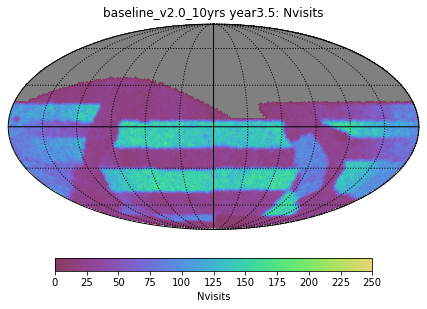

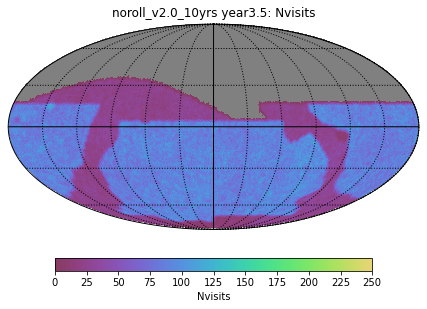

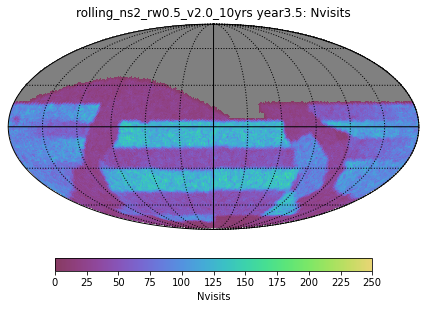

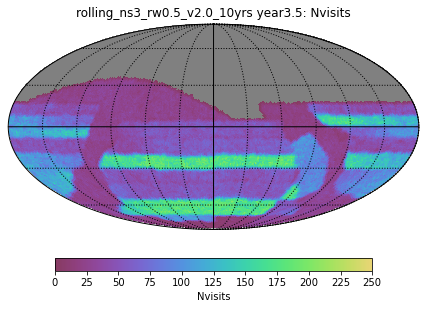

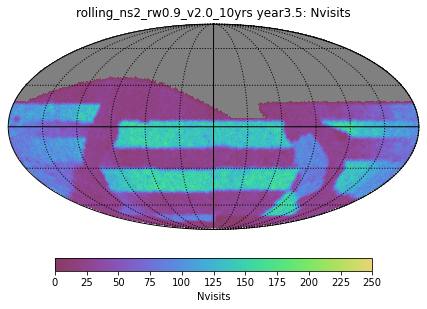

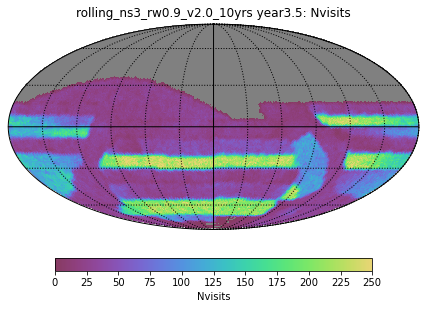

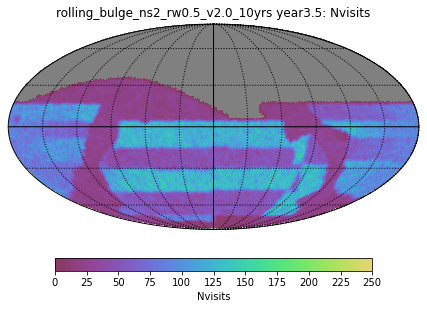

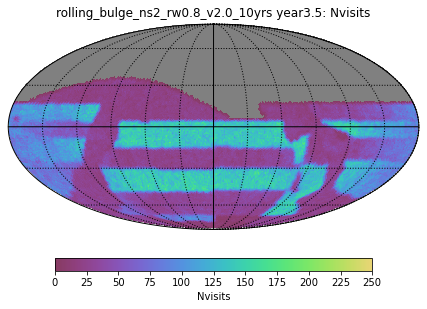

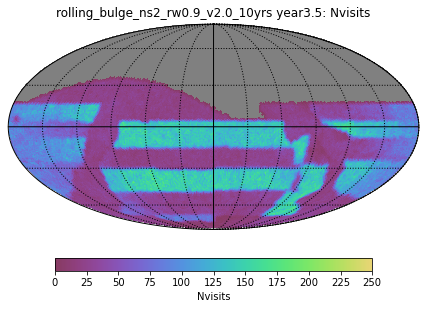

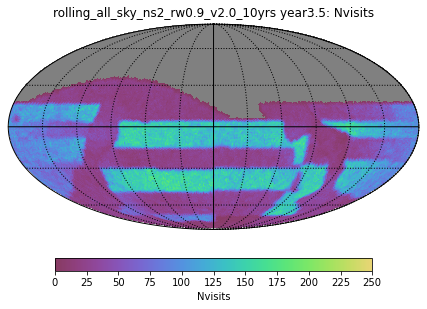

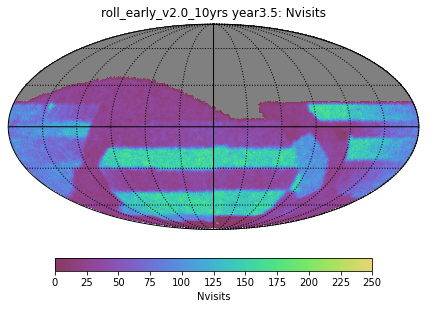

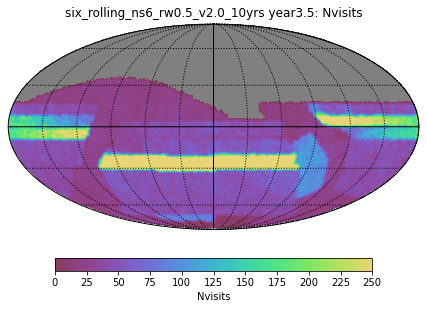

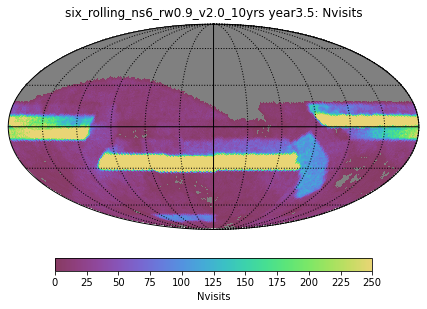

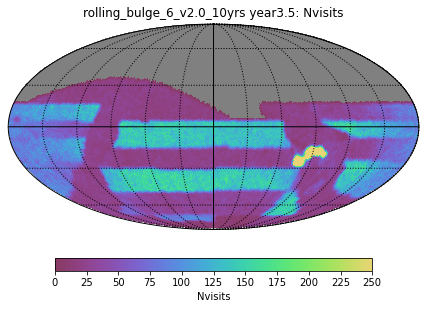

In [9]:
ph = maf.PlotHandler(outDir='temp', thumbnail=False, figformat='png')
for r in these_runs:
    ph.setMetricBundles([nvisits[r]])
    with warnings.catch_warnings():
        ph.plot(plotFunc=maf.HealpixSkyMap(), plotDicts={'colorMin':0, 'colorMax': 250})

In [10]:
# list the metric sets
msets = list(metric_set.groupby('metric set').first().index)
msets

for k in msets:
    print(k, len(metric_set.loc[k]))
    # Check that the metrics are correctly named and in the summary file
    summaries.loc[:, metric_set.loc[k]['metric']]

AGN N QSO 6
AGN SF 12
AGN timelag 12
DESC WFD 9
GP season 6
GP visit 6
N Visits 9
SRD 5
SSO N Objs 6
SSO discovery 14
SSO discovery options 22
SSO fraction 3 bands 14
SSO fraction 4 bands 14
SSO fraction 5 bands 14
SSO fraction 6 bands 14
SSO lightcurve inversion 8
TVS KNe 7
TVS PeriodDetect 6
TVS PeriodModulation 8
TVS Presto 2
TVS TDE 5
TVS XRB 3
TVS microlensing 4
TVS microlensing all 27
TVS short 8
cadence 8
galaxies 1
plot areas 5
radar 13
short description 10


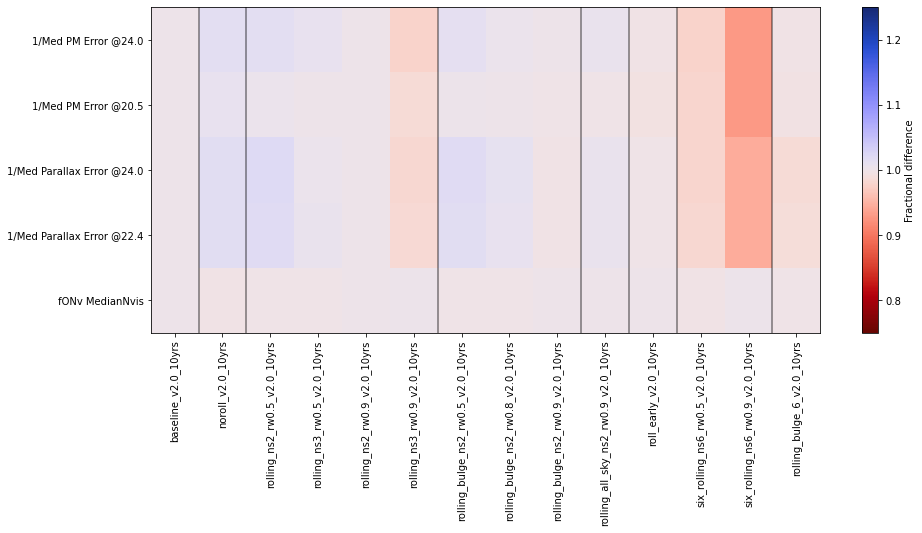

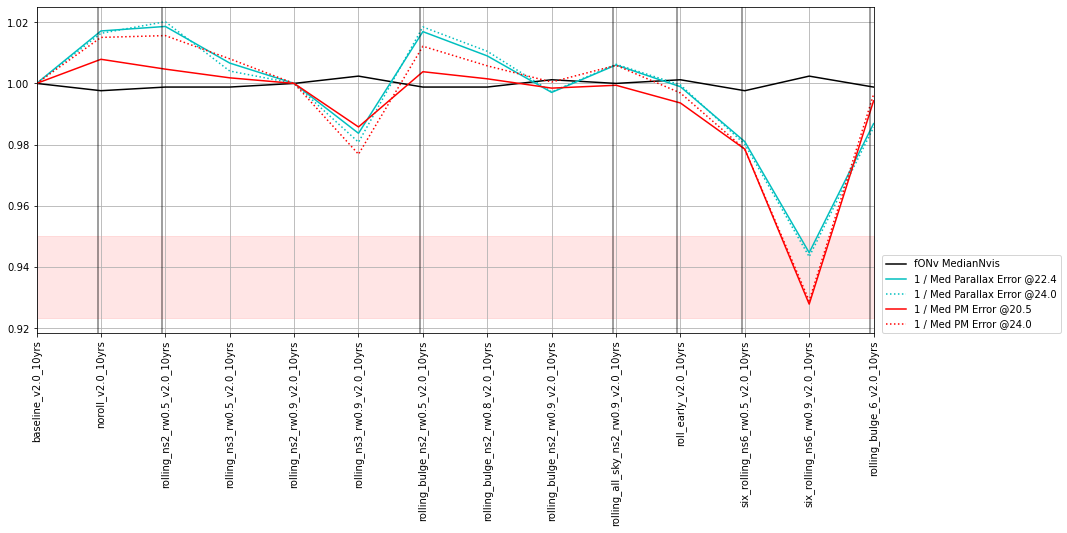

In [11]:
k = 'SRD'

# Plot two versions of the figures
fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs, metric_set.loc[k]['metric']], 
                                   baseline_run=baseline_run,
                                   metric_label_map=metric_set.loc[k]['short_name'],
                                   metric_set=metric_set.loc[k],
                                  color_range=0.5)
fig.set_figwidth(15)
for l in lines:
    ax.axvline(l, color='k', alpha=0.5)

fig, ax = maf.plot_run_metric(summaries.loc[these_runs, metric_set.loc[k]['metric']], 
                              baseline_run=baseline_run,
                              metric_set=metric_set.loc[k],
                              metric_label_map=metric_set.loc[k]['short_name'],
                             horizontal_quantity='run',
                             vertical_quantity='value')
fig.set_figwidth(15)
#ax.set_ylim(0.5, 1.5)
lgd = plt.legend(loc=(1.01, 0.0), fancybox=True, numpoints=1, fontsize='medium')
for l in lines:
    ax.axvline(l-0.05, color='k', alpha=0.5)

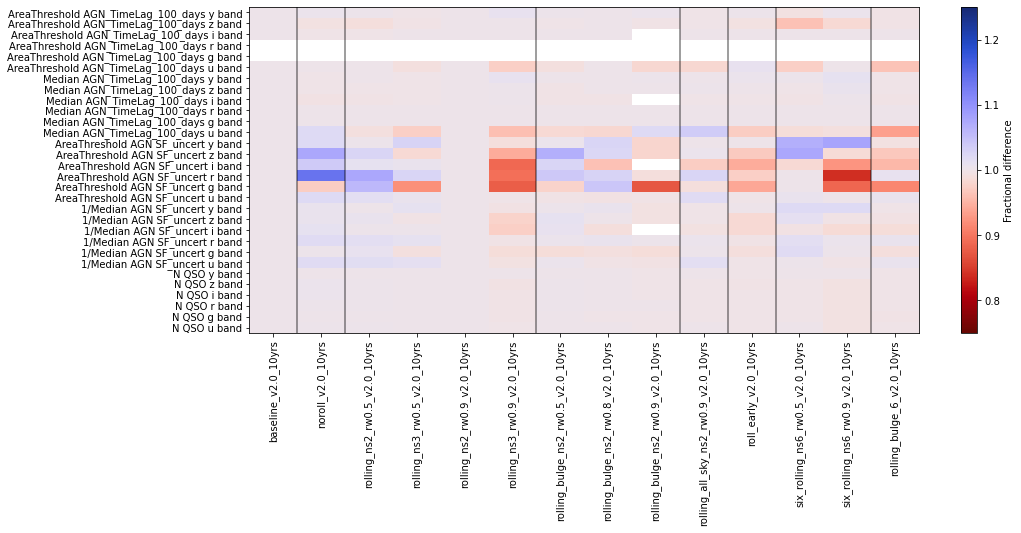

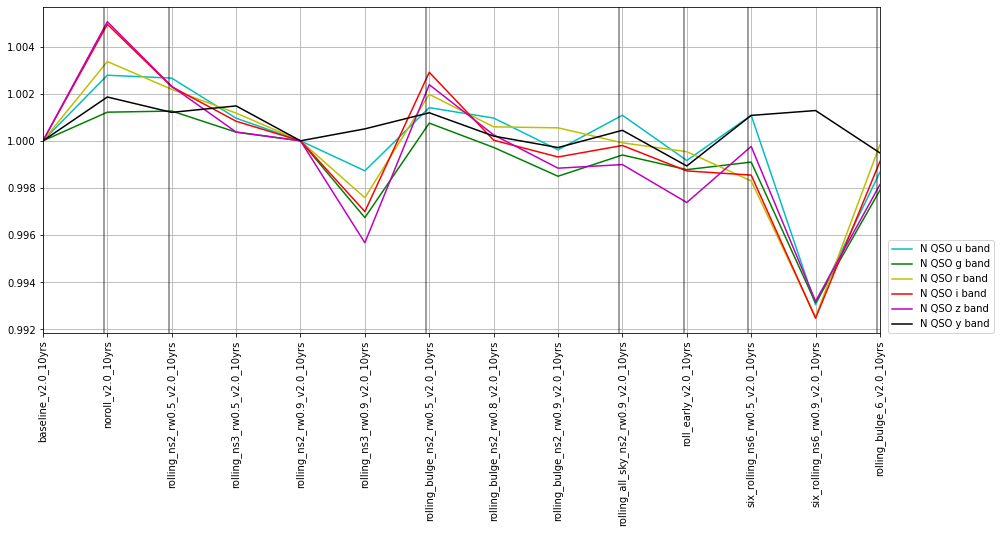

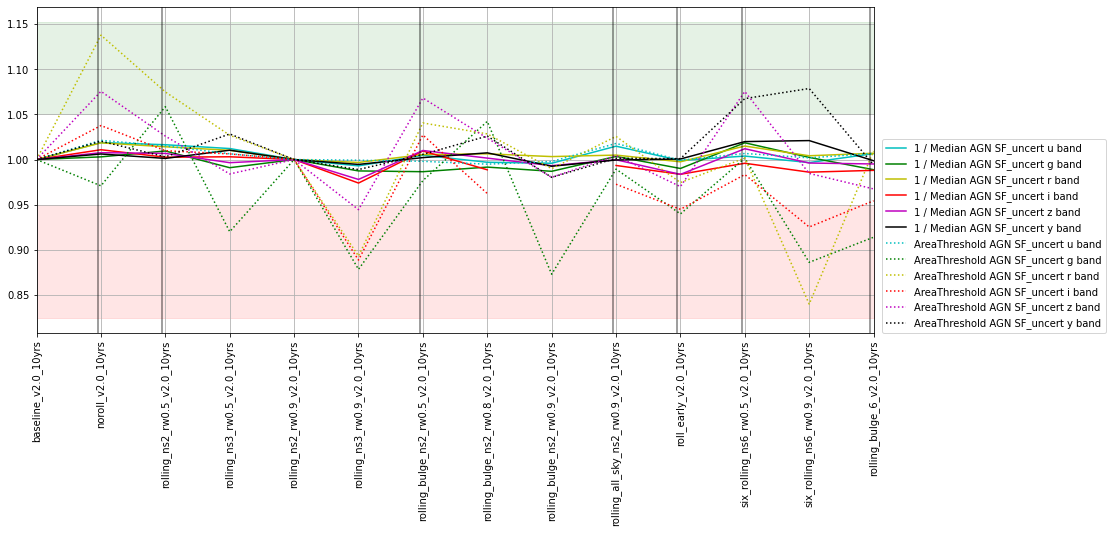

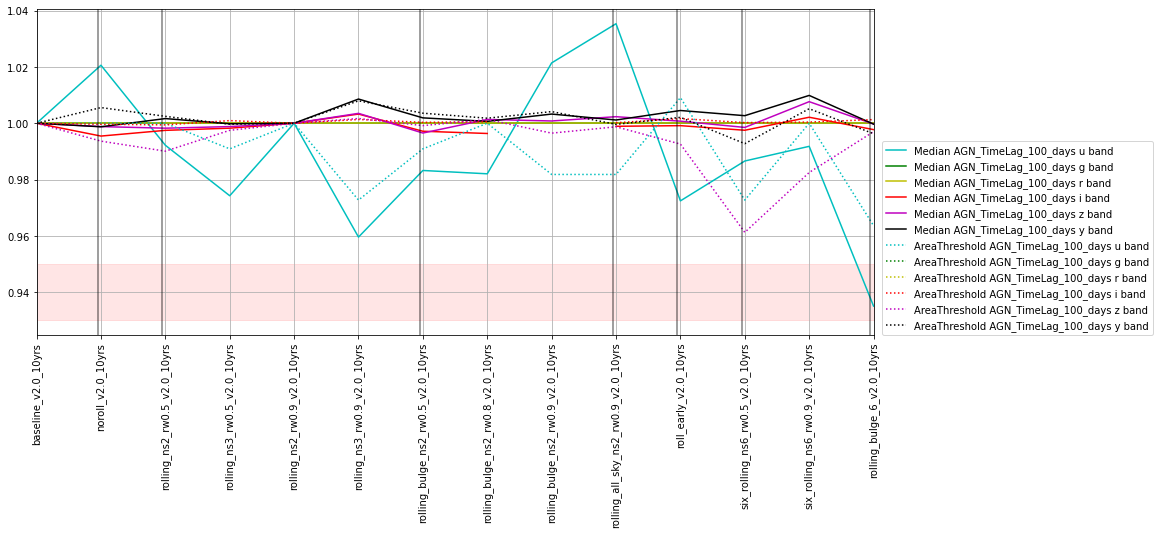

In [12]:
# AGN metrics
k_sets = [k for k in msets if k.startswith('AGN')]

msub = metric_set.loc[k_sets].reset_index('metric set')
fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs,msub['metric']], 
                                   baseline_run=baseline_run,
                                   metric_label_map=msub['short_name'],
                                   metric_set=msub,
                                  color_range=0.5)
fig.set_figwidth(15)
for l in lines:
    ax.axvline(l, color='k', alpha=0.5)

for k in k_sets:
    fig, ax = maf.plot_run_metric(summaries.loc[these_runs, metric_set.loc[k]['metric']], 
                                  baseline_run=baseline_run,
                                  metric_set=metric_set.loc[k],
                                  metric_label_map=metric_set.loc[k]['short_name'],
                                 horizontal_quantity='run',
                                 vertical_quantity='value')
    fig.set_figwidth(15)
    #ax.set_ylim(0.5, 1.5)
    lgd = plt.legend(loc=(1.01, 0.0), fancybox=True, numpoints=1, fontsize='medium')
    for l in lines:
        ax.axvline(l-0.05, color='k', alpha=0.5)

SSO N Objs
SSO discovery
SSO discovery options
SSO fraction 3 bands
SSO fraction 4 bands
SSO fraction 5 bands
SSO fraction 6 bands
SSO lightcurve inversion


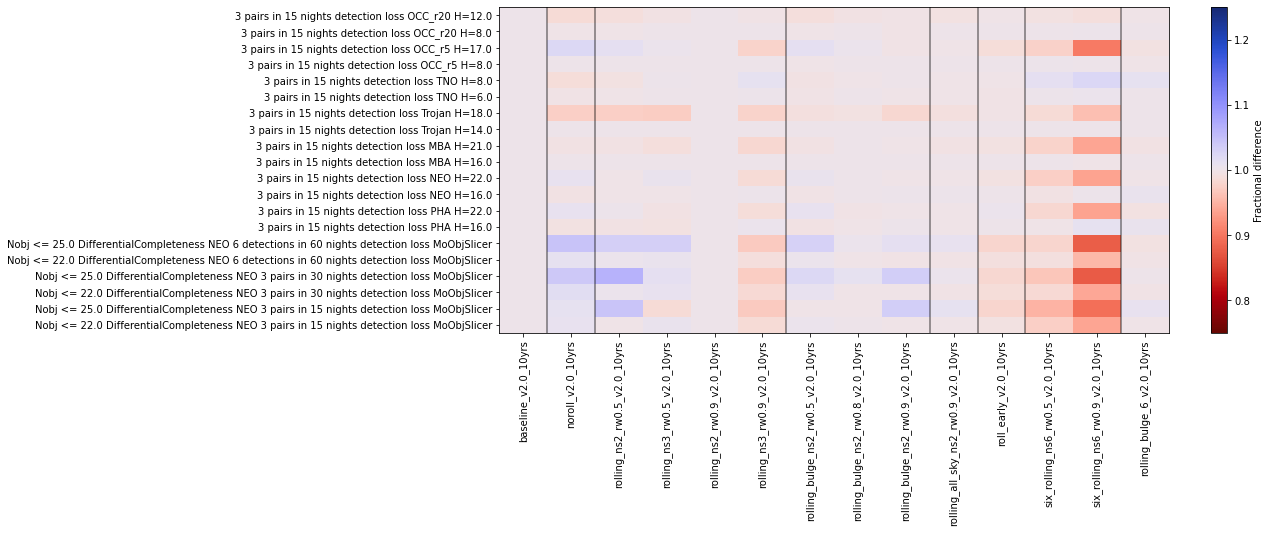

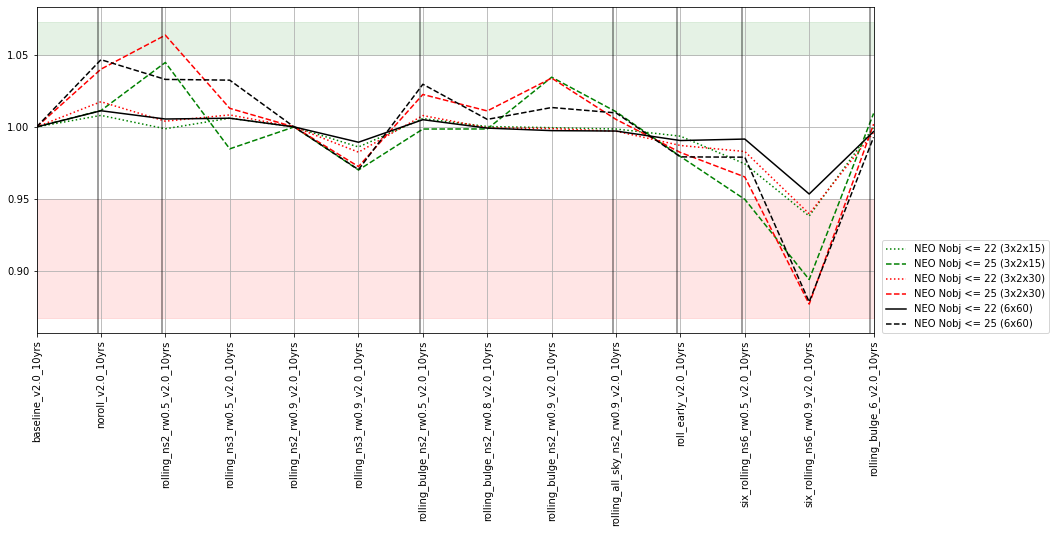

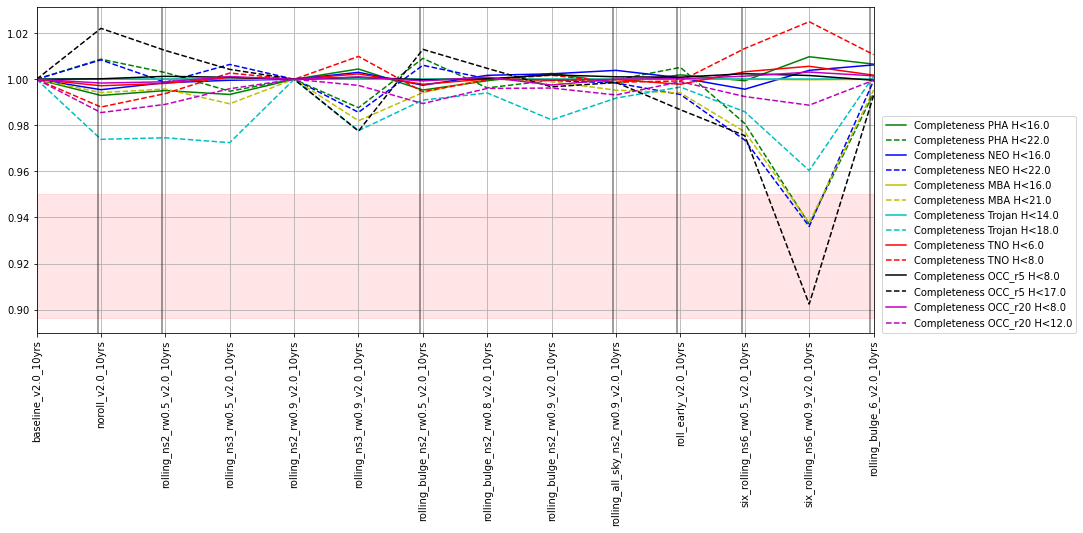

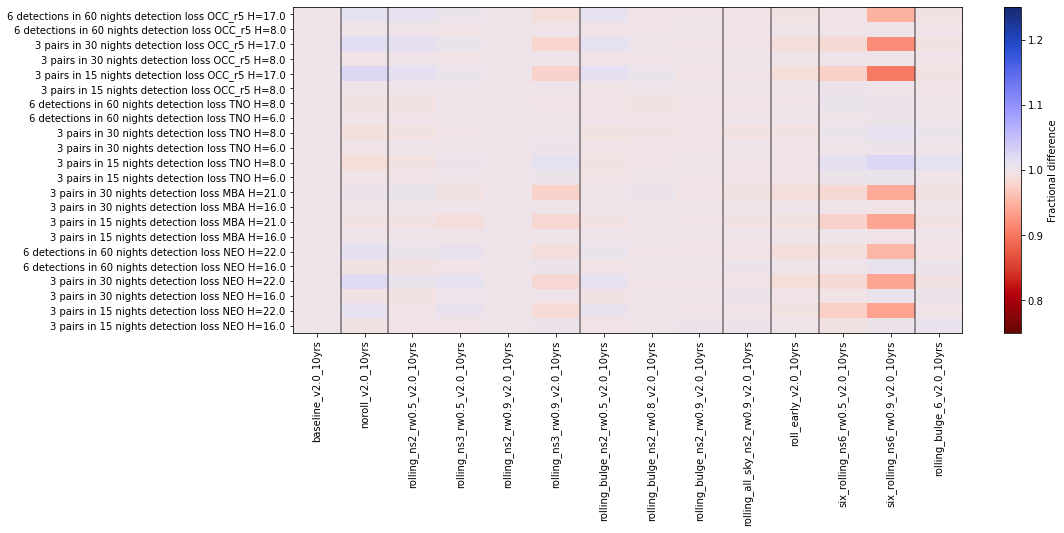

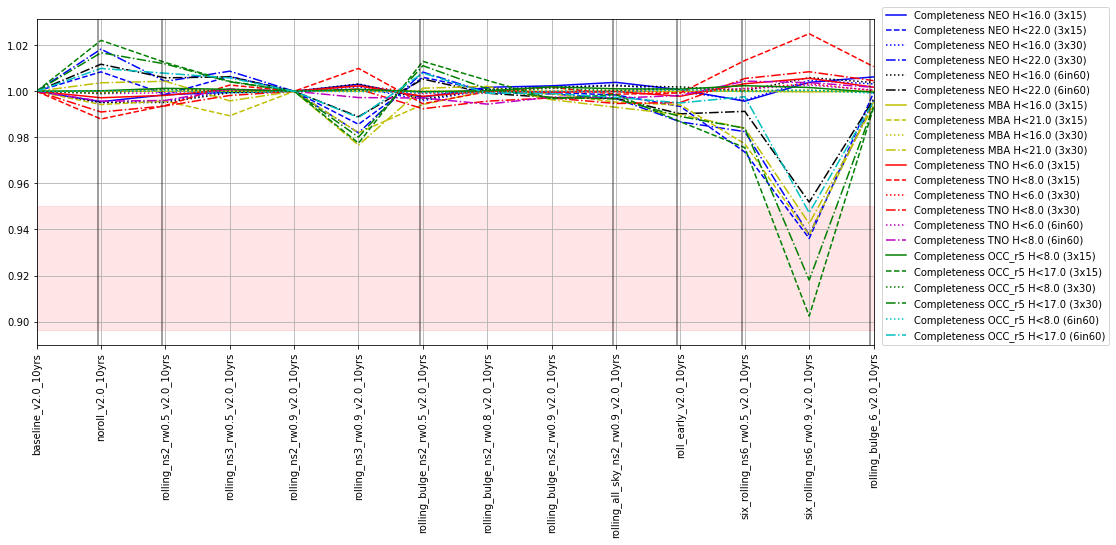

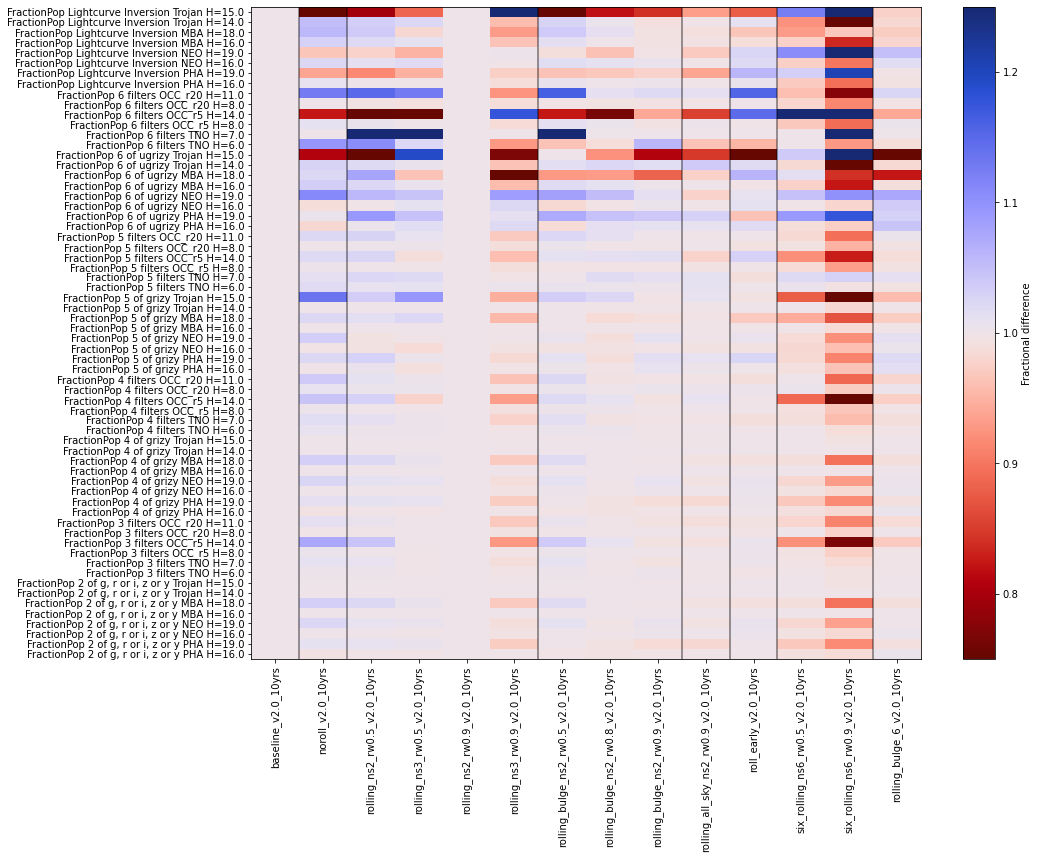

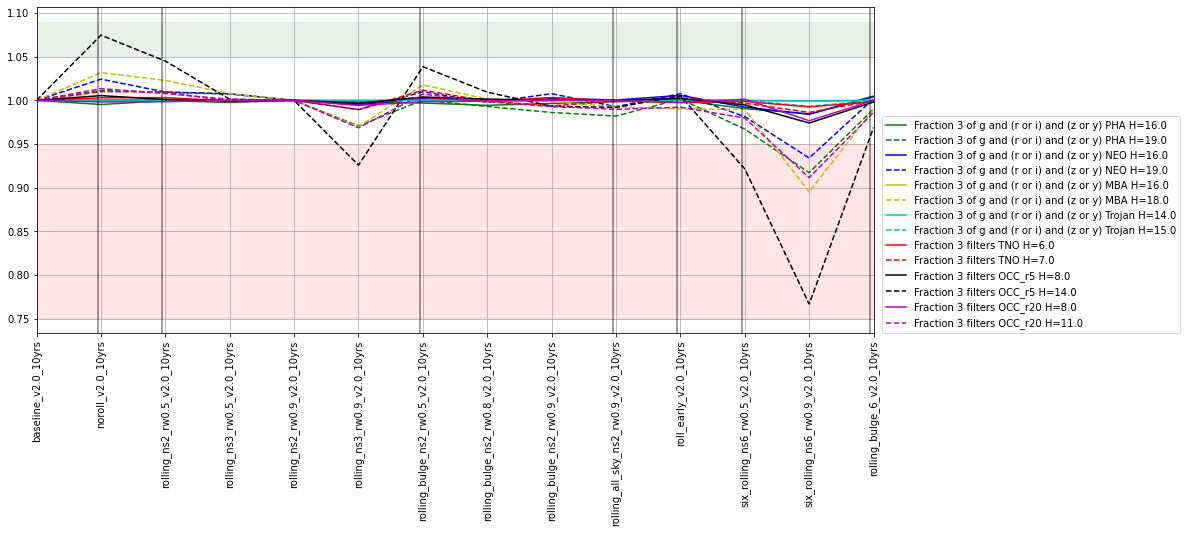

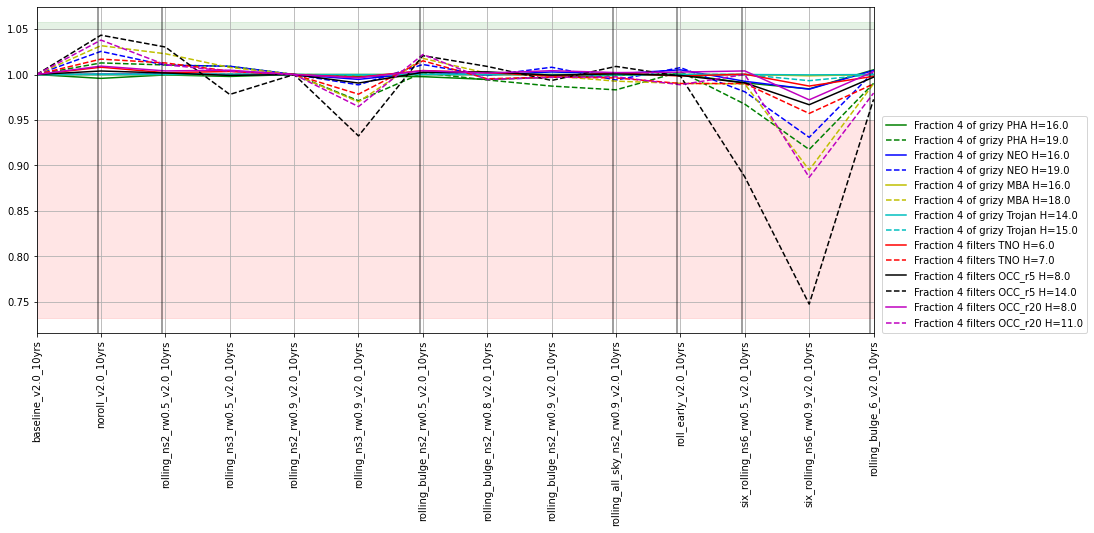

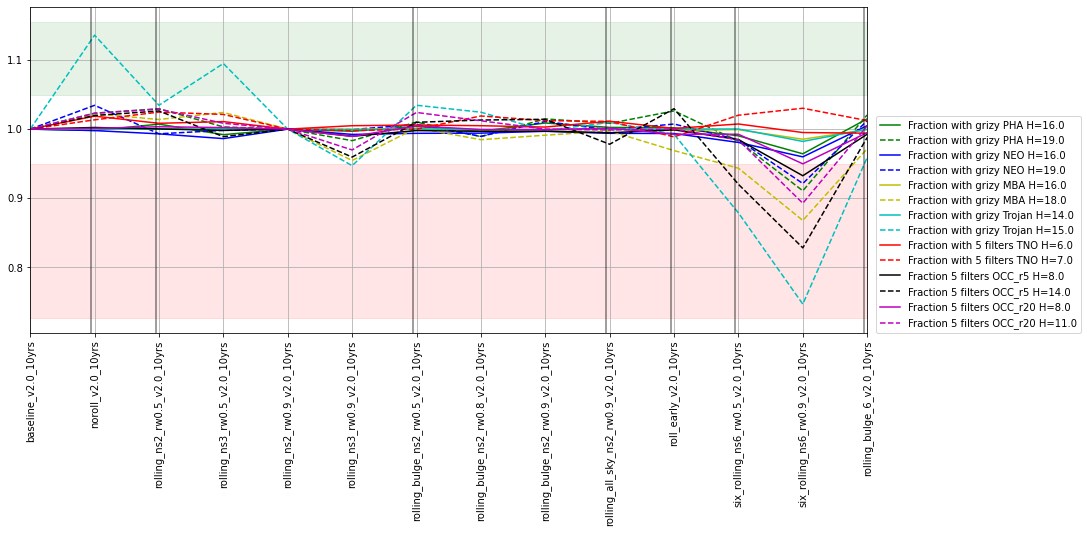

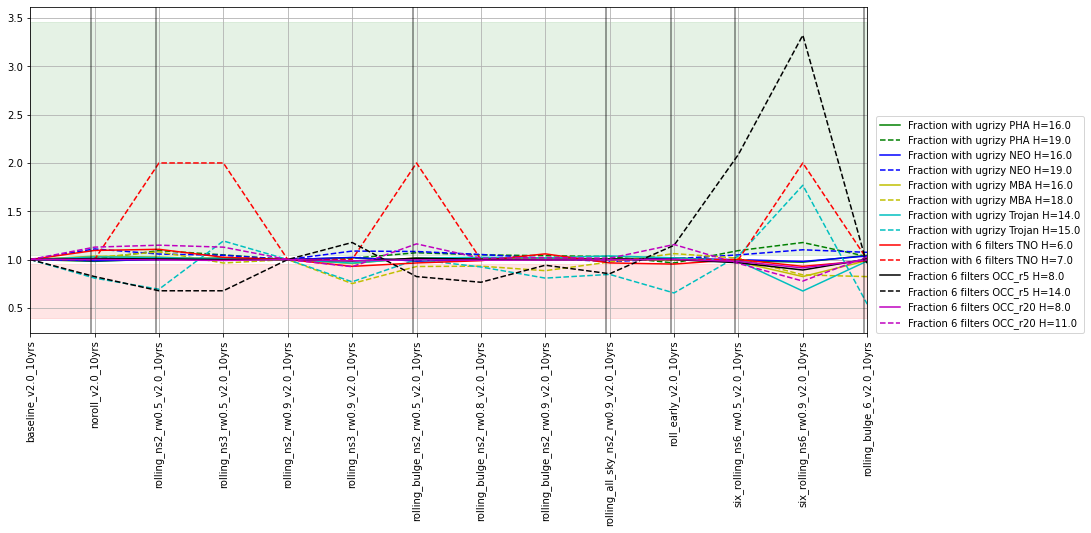

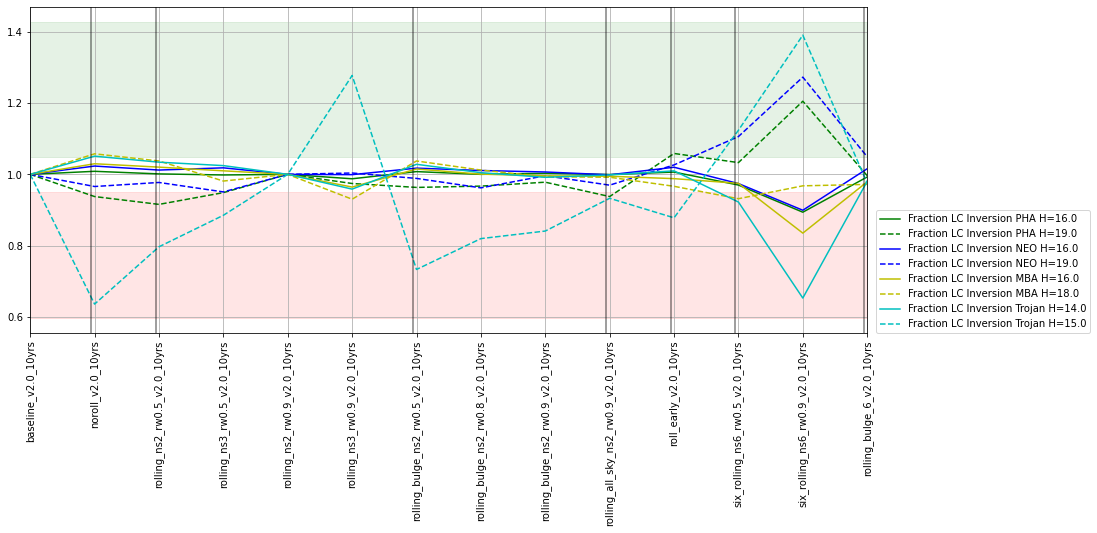

In [13]:
# sso metrics
k_sets = [k for k in msets if k.startswith('SSO')][0:2]

msub = metric_set.loc[k_sets].reset_index('metric set')
fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs, msub['metric']], 
                                   baseline_run=baseline_run,
                                   #metric_label_map=msub['short_name'],
                                   metric_set=msub,
                                  color_range=0.5)
fig.set_figwidth(15)
for l in lines:
    ax.axvline(l, color='k', alpha=0.5)

for k in k_sets:
    print(k)
    fig, ax = maf.plot_run_metric(summaries.loc[these_runs, metric_set.loc[k]['metric']], 
                                  baseline_run=baseline_run,
                                  metric_set=metric_set.loc[k],
                                  metric_label_map=metric_set.loc[k]['short_name'],
                                 horizontal_quantity='run',
                                 vertical_quantity='value')
    fig.set_figwidth(15)
    #ax.set_ylim(0.5, 1.5)
    lgd = plt.legend(loc=(1.01, 0.0), fancybox=True, numpoints=1, fontsize='medium')
    for l in lines:
        ax.axvline(l-0.05, color='k', alpha=0.5)
        
# discovery options 
k_sets = [k for k in msets if k.startswith('SSO') and 'discovery options' in k]

msub = metric_set.loc[k_sets].reset_index('metric set')
fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs, msub['metric']], 
                                   baseline_run=baseline_run,
                                   #metric_label_map=msub['short_name'],
                                   metric_set=msub,
                                  color_range=0.5)
fig.set_figwidth(15)
for l in lines:
    ax.axvline(l, color='k', alpha=0.5)

for k in k_sets:
    print(k)
    fig, ax = maf.plot_run_metric(summaries.loc[these_runs, metric_set.loc[k]['metric']], 
                                  baseline_run=baseline_run,
                                  metric_set=metric_set.loc[k],
                                  metric_label_map=metric_set.loc[k]['short_name'],
                                 horizontal_quantity='run',
                                 vertical_quantity='value')
    fig.set_figwidth(15)
    #ax.set_ylim(0.5, 1.5)
    lgd = plt.legend(loc=(1.01, 0.0), fancybox=True, numpoints=1, fontsize='medium')
    for l in lines:
        ax.axvline(l-0.05, color='k', alpha=0.5)
        
# characterization
k_sets = [k for k in msets if k.startswith('SSO')][3:]

msub = metric_set.loc[k_sets].reset_index('metric set')
fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs, msub['metric']], 
                                   baseline_run=baseline_run,
                                   #metric_label_map=msub['short_name'],
                                   metric_set=msub,
                                  color_range=0.5)
fig.set_figwidth(15)
fig.set_figheight(12)
for l in lines:
    ax.axvline(l, color='k', alpha=0.5)

for k in k_sets:
    print(k)
    fig, ax = maf.plot_run_metric(summaries.loc[these_runs, metric_set.loc[k]['metric']], 
                                  baseline_run=baseline_run,
                                  metric_set=metric_set.loc[k],
                                  metric_label_map=metric_set.loc[k]['short_name'],
                                 horizontal_quantity='run',
                                 vertical_quantity='value')
    fig.set_figwidth(15)
    #ax.set_ylim(0.5, 1.5)
    lgd = plt.legend(loc=(1.01, 0.0), fancybox=True, numpoints=1, fontsize='medium')
    for l in lines:
        ax.axvline(l-0.05, color='k', alpha=0.5)

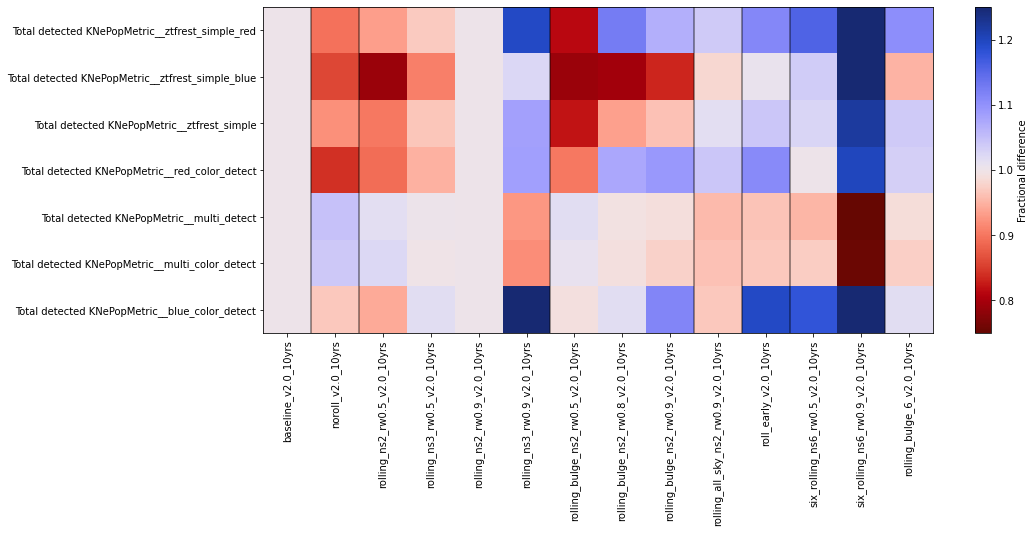

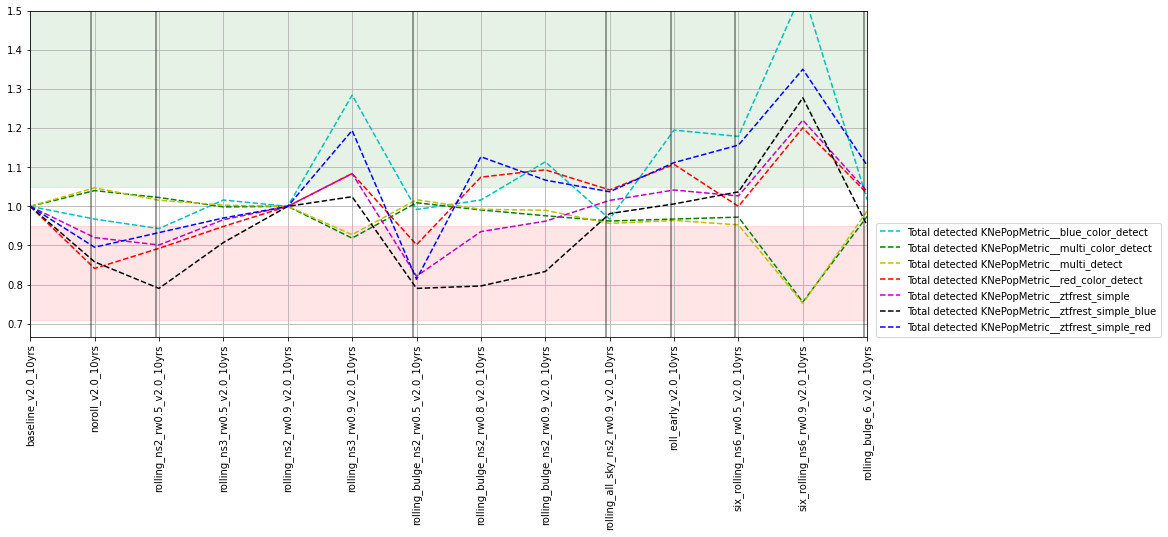

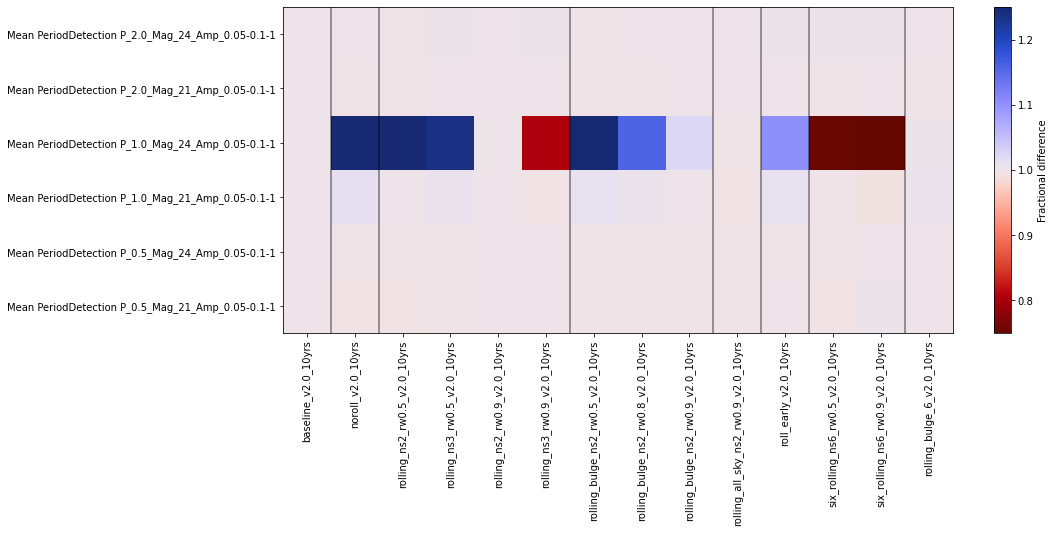

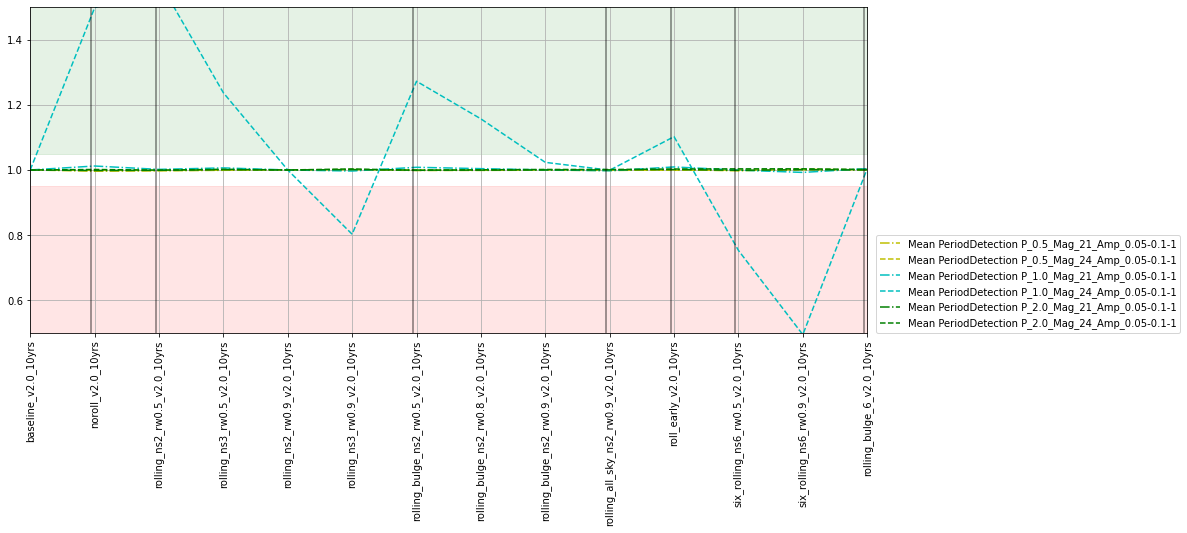

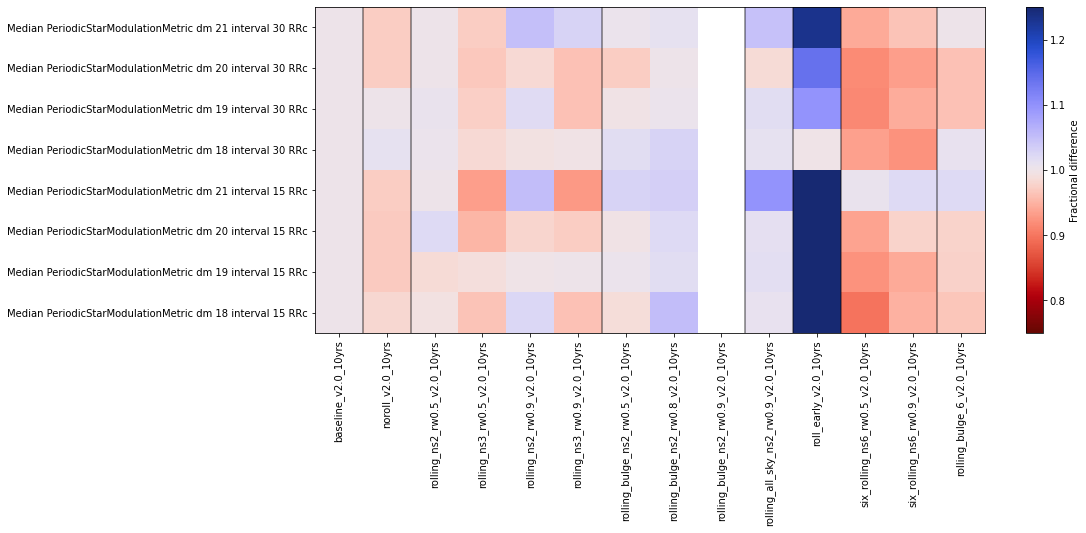

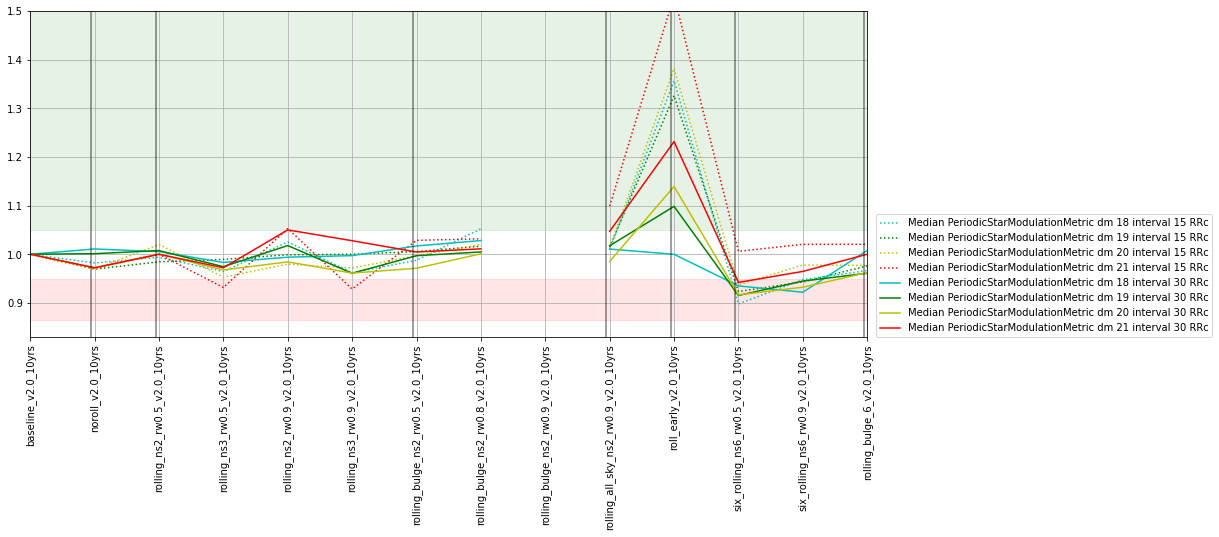

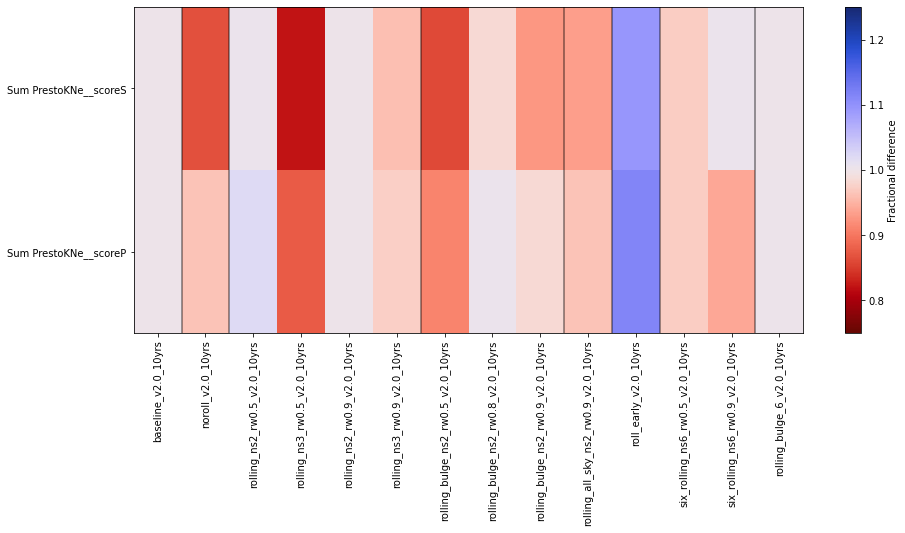

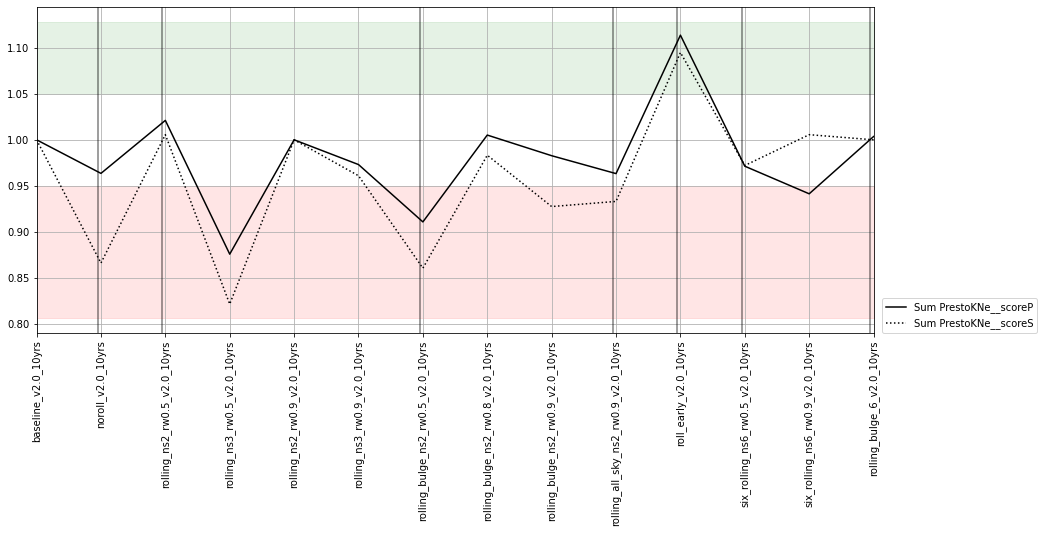

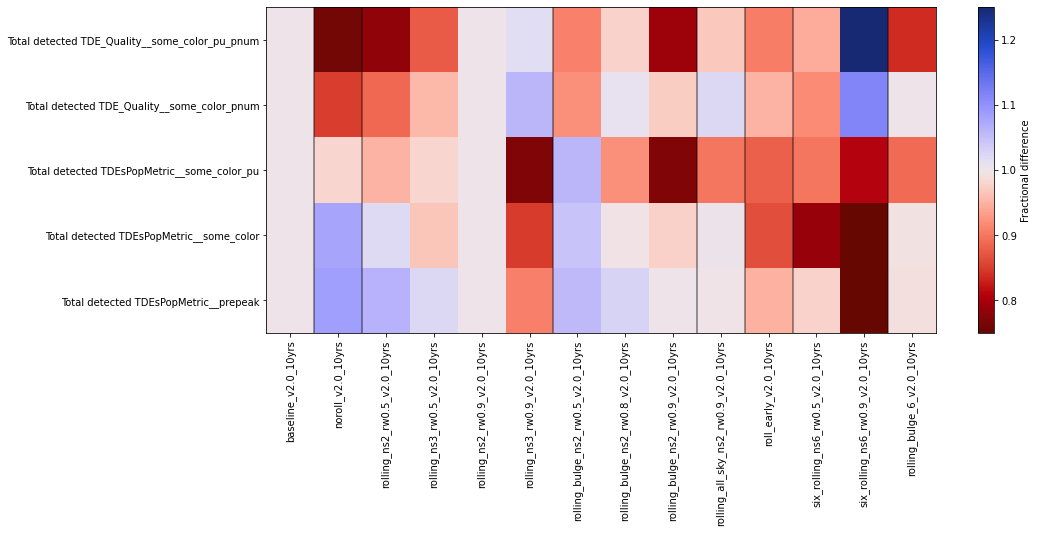

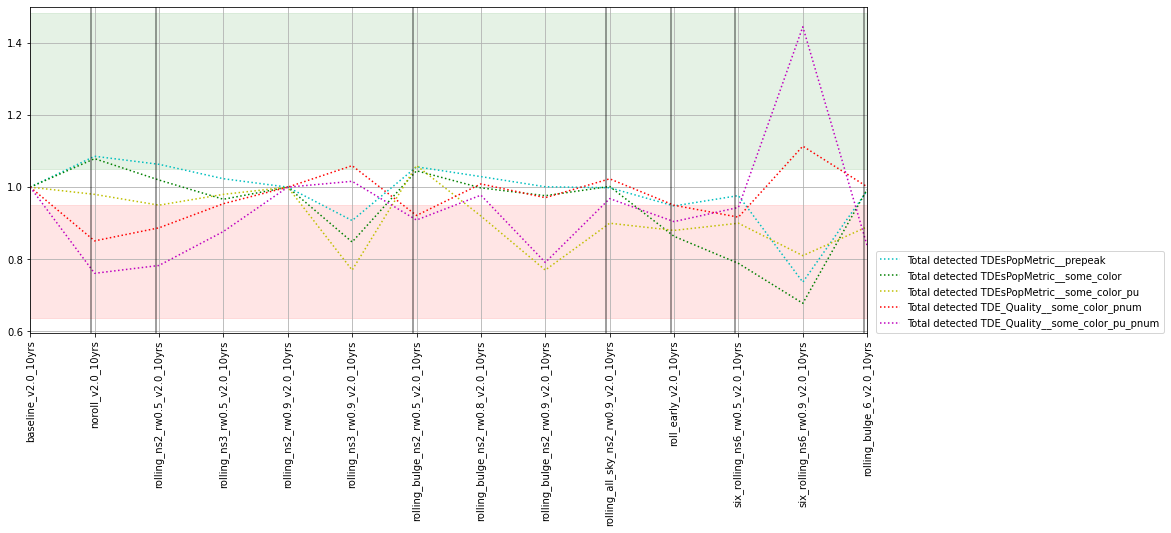

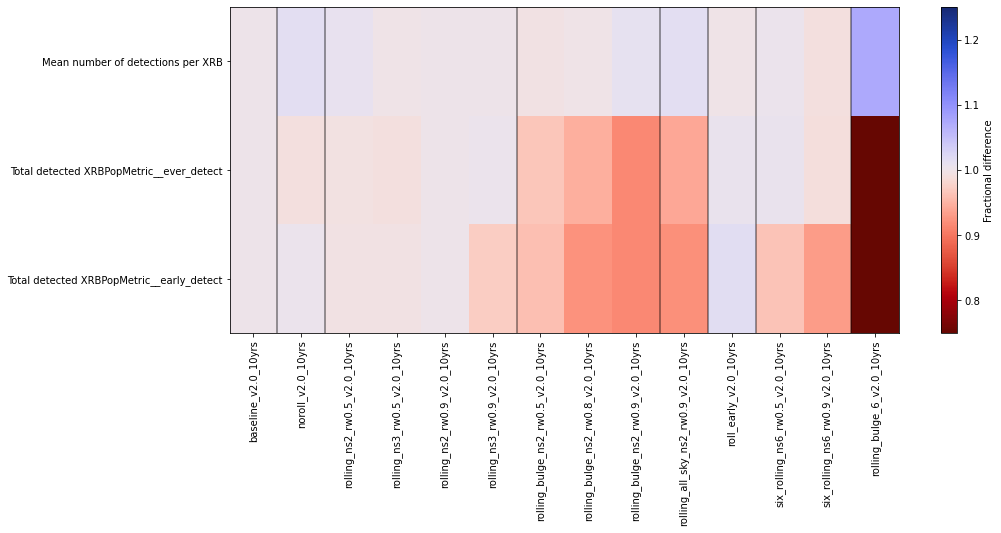

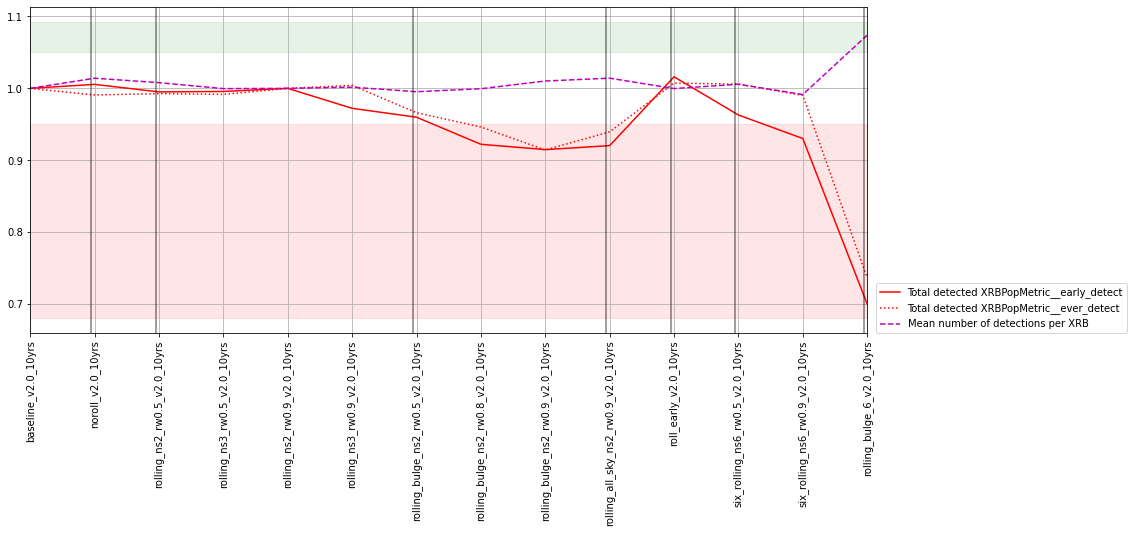

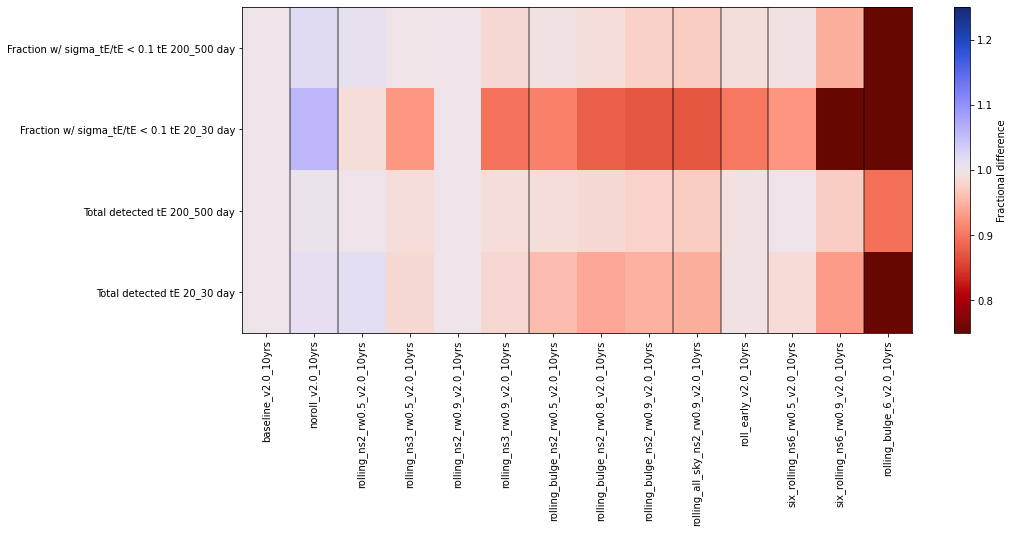

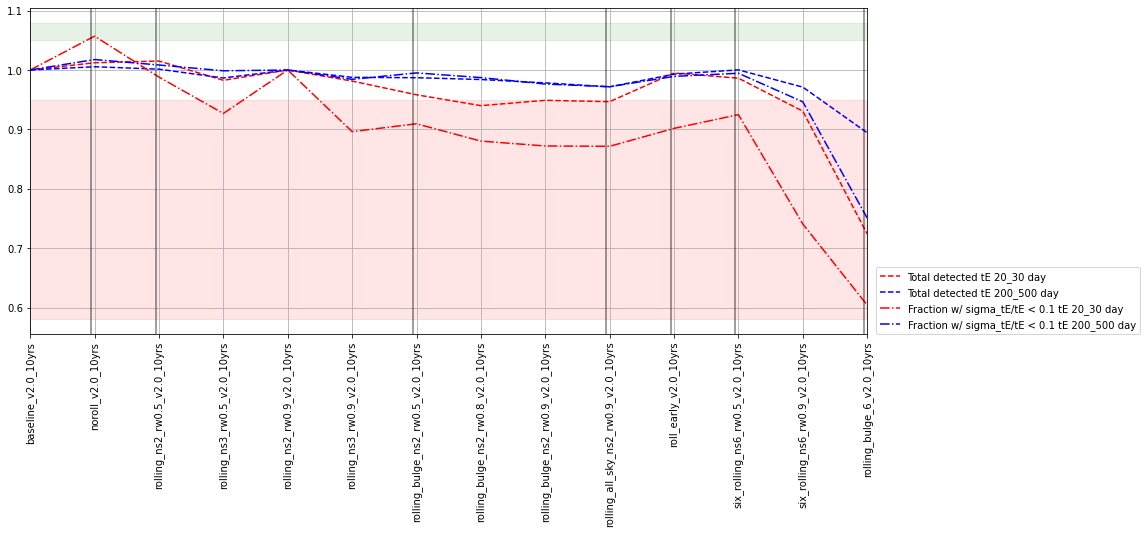

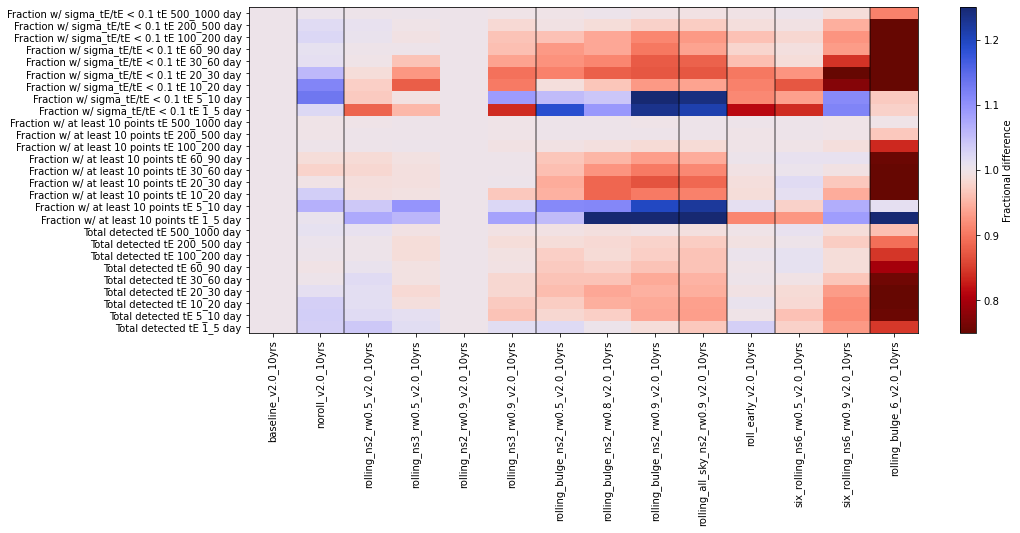

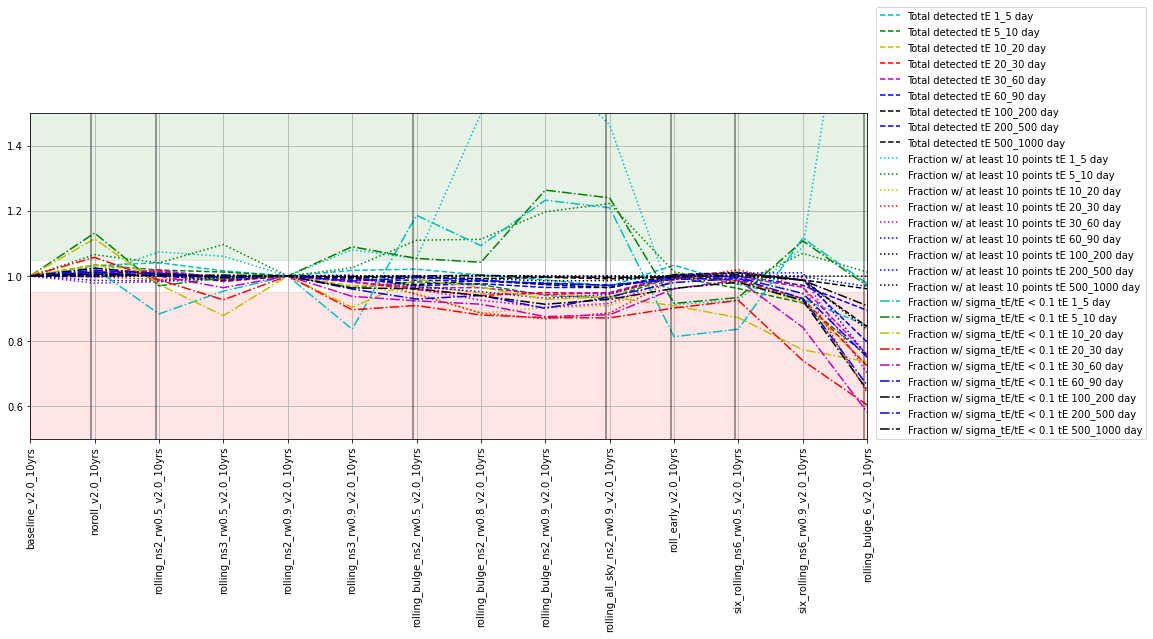

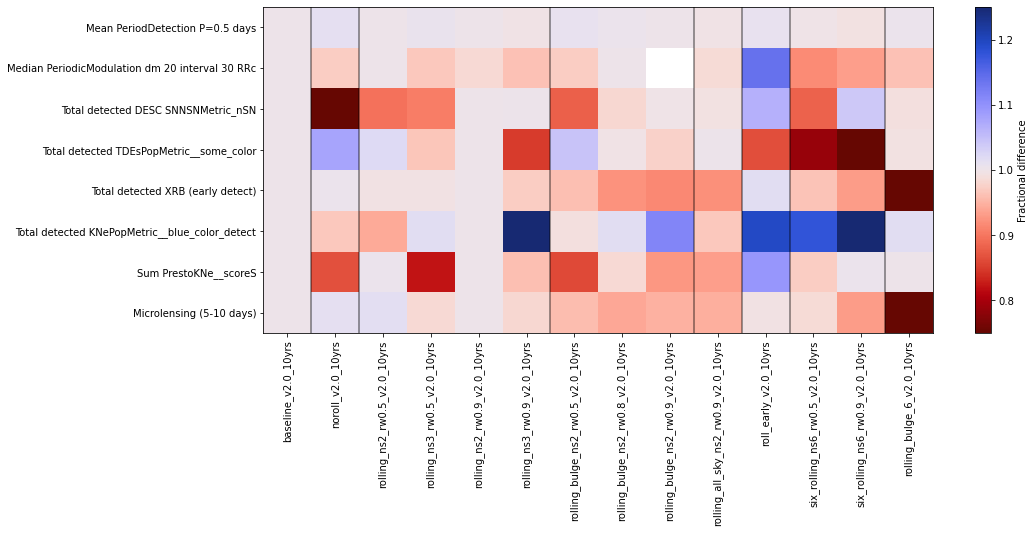

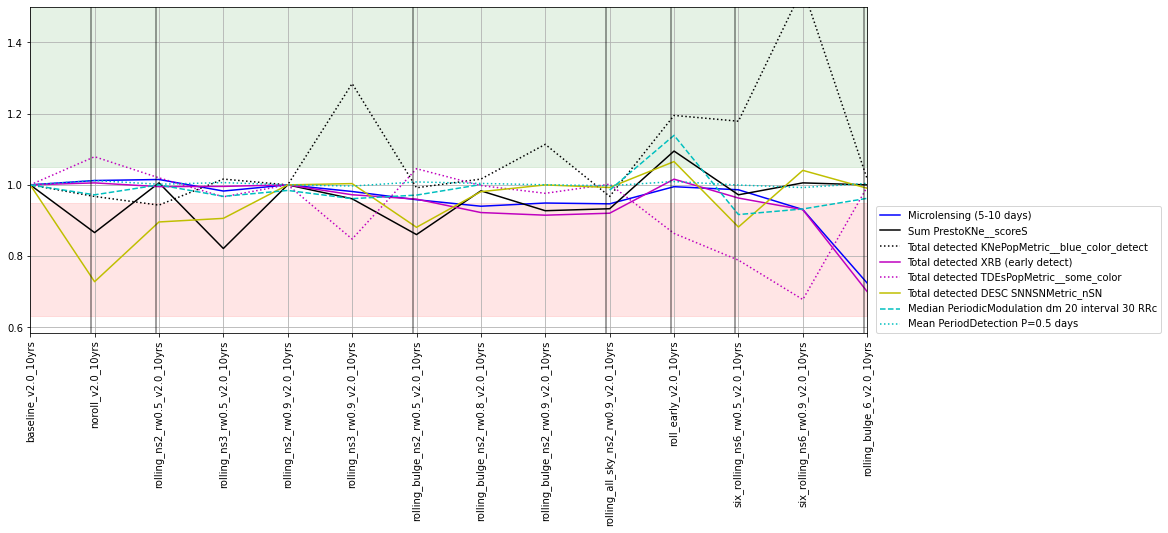

In [16]:
# TVS metrics
k_sets = [k for k in msets if k.startswith('TVS')]

for k in k_sets:
    msub = metric_set.loc[k]
    fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs,msub['metric']], 
                                       baseline_run=baseline_run,
                                       metric_label_map=msub['short_name'],
                                       metric_set=msub,
                                      color_range=0.5)
    fig.set_figwidth(15)
    for l in lines:
        ax.axvline(l, color='k', alpha=0.5)

    fig, ax = maf.plot_run_metric(summaries.loc[these_runs, metric_set.loc[k]['metric']], 
                                  baseline_run=baseline_run,
                                  metric_set=metric_set.loc[k],
                                  metric_label_map=metric_set.loc[k]['short_name'],
                                 horizontal_quantity='run',
                                 vertical_quantity='value')
    fig.set_figwidth(15)
    ylim = list(ax.get_ylim())
    if ylim[0] < 0.5:
        ylim[0] = 0.5
    if ylim[1] > 1.5:
        ylim[1] = 1.5
    ax.set_ylim(ylim)
    lgd = plt.legend(loc=(1.01, 0.0), fancybox=True, numpoints=1, fontsize='medium')
    for l in lines:
        ax.axvline(l-0.05, color='k', alpha=0.5)

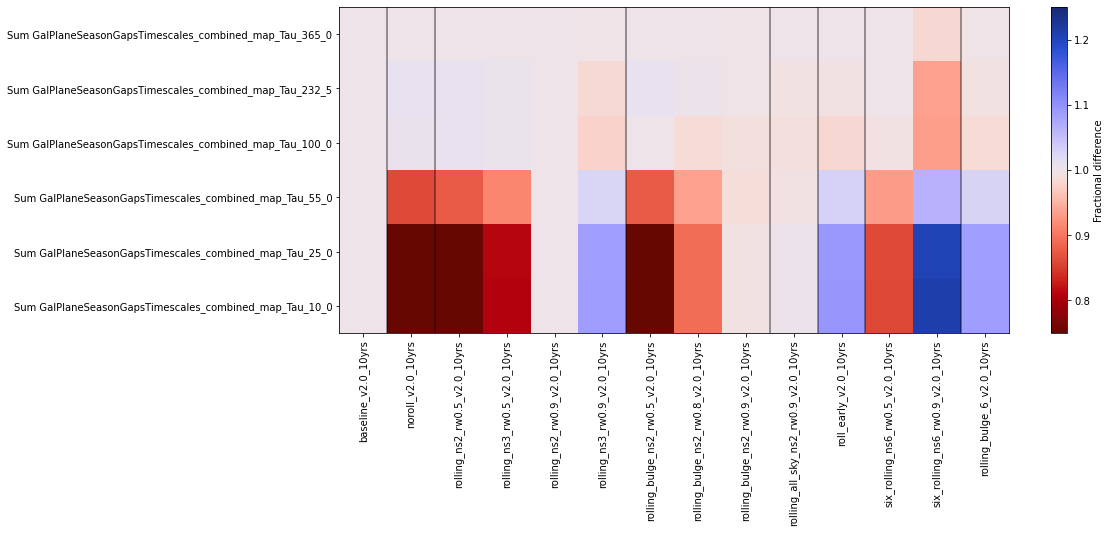

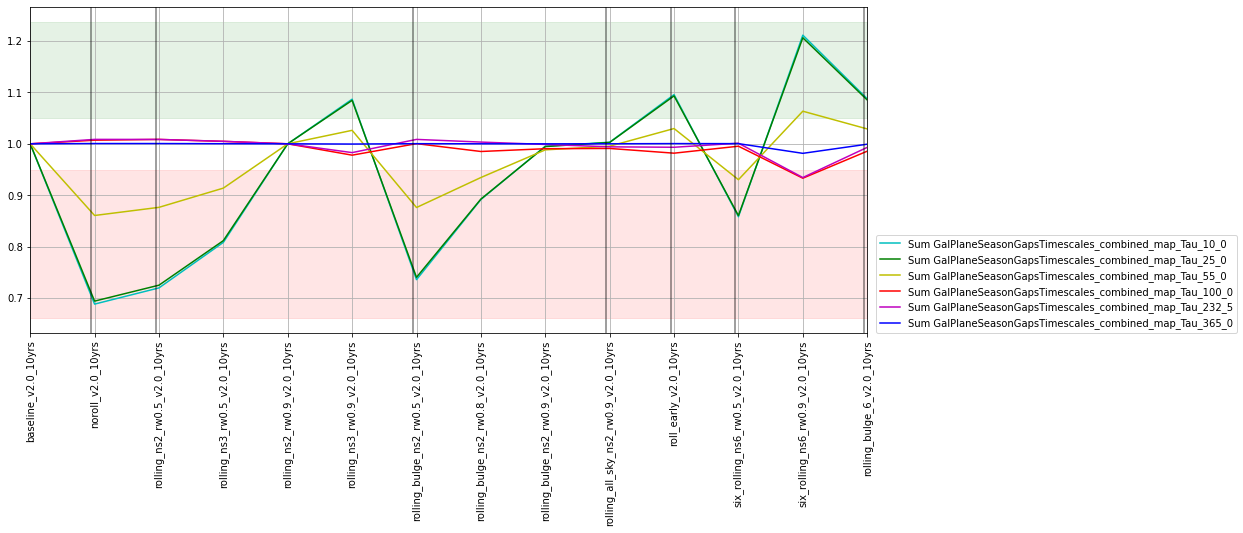

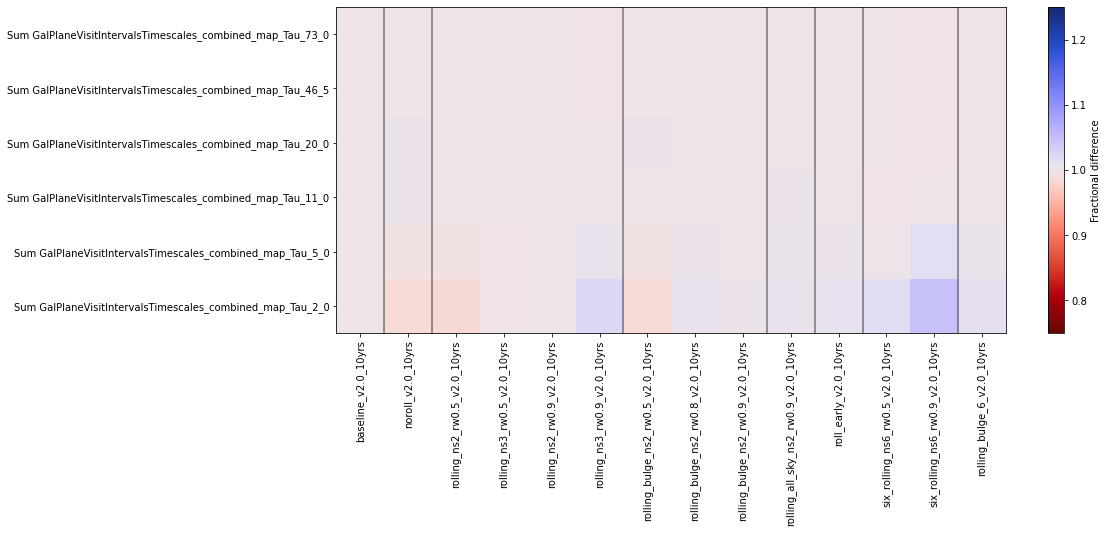

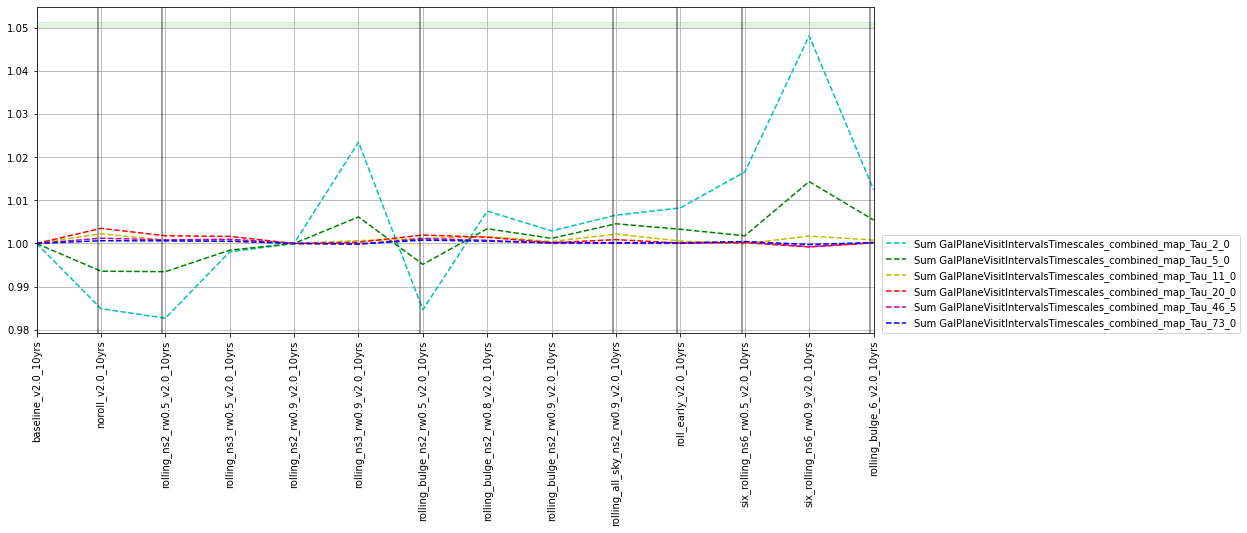

In [18]:
# GP footprint metrics
k_sets = [k for k in msets if k.startswith('GP')]

for k in k_sets:
    msub = metric_set.loc[k]
    fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs,msub['metric']], 
                                       baseline_run=baseline_run,
                                       metric_label_map=msub['short_name'],
                                       metric_set=msub,
                                      color_range=0.5)
    fig.set_figwidth(15)
    for l in lines:
        ax.axvline(l, color='k', alpha=0.5)

    fig, ax = maf.plot_run_metric(summaries.loc[these_runs, metric_set.loc[k]['metric']], 
                                  baseline_run=baseline_run,
                                  metric_set=metric_set.loc[k],
                                  metric_label_map=metric_set.loc[k]['short_name'],
                                 horizontal_quantity='run',
                                 vertical_quantity='value')
    fig.set_figwidth(15)
    #ax.set_ylim(0.5, 1.5)
    lgd = plt.legend(loc=(1.01, 0.0), fancybox=True, numpoints=1, fontsize='medium')
    for l in lines:
        ax.axvline(l-0.05, color='k', alpha=0.5)

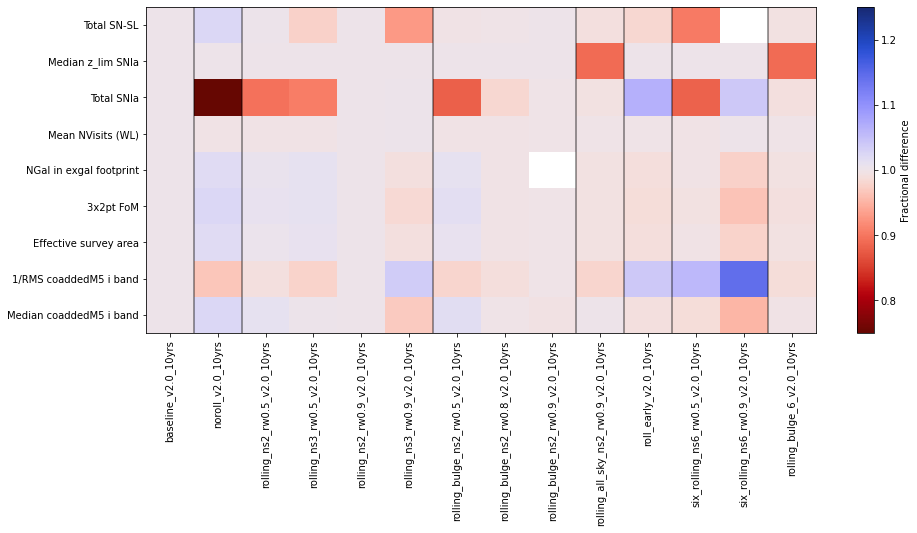

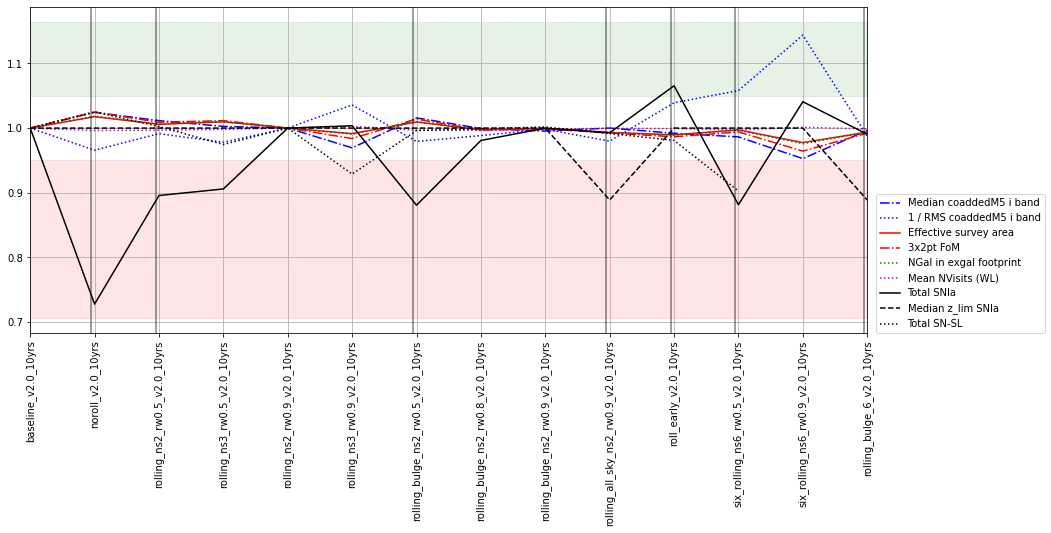

In [19]:
# DESC metrics
k_sets = [k for k in msets if k.startswith('DESC')]

for k in k_sets:
    msub = metric_set.loc[k]
    fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs,msub['metric']], 
                                       baseline_run=baseline_run,
                                       metric_label_map=msub['short_name'],
                                       metric_set=msub,
                                      color_range=0.5)
    fig.set_figwidth(15)
    for l in lines:
        ax.axvline(l, color='k', alpha=0.5)

    fig, ax = maf.plot_run_metric(summaries.loc[these_runs, metric_set.loc[k]['metric']], 
                                  baseline_run=baseline_run,
                                  metric_set=metric_set.loc[k],
                                  metric_label_map=metric_set.loc[k]['short_name'],
                                 horizontal_quantity='run',
                                 vertical_quantity='value')
    fig.set_figwidth(15)
    #ax.set_ylim(0.5, 1.5)
    lgd = plt.legend(loc=(1.01, 0.0), fancybox=True, numpoints=1, fontsize='medium')
    for l in lines:
        ax.axvline(l-0.05, color='k', alpha=0.5)

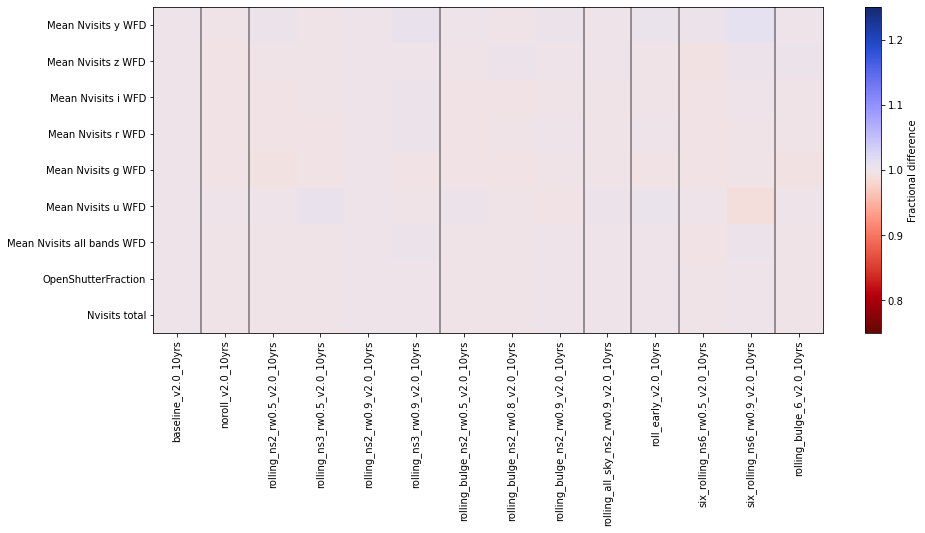

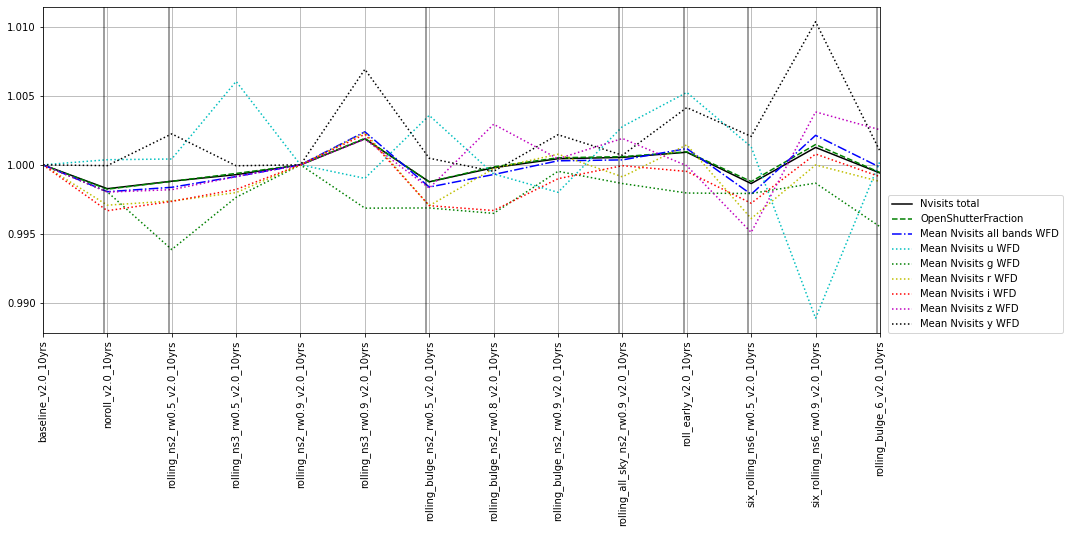

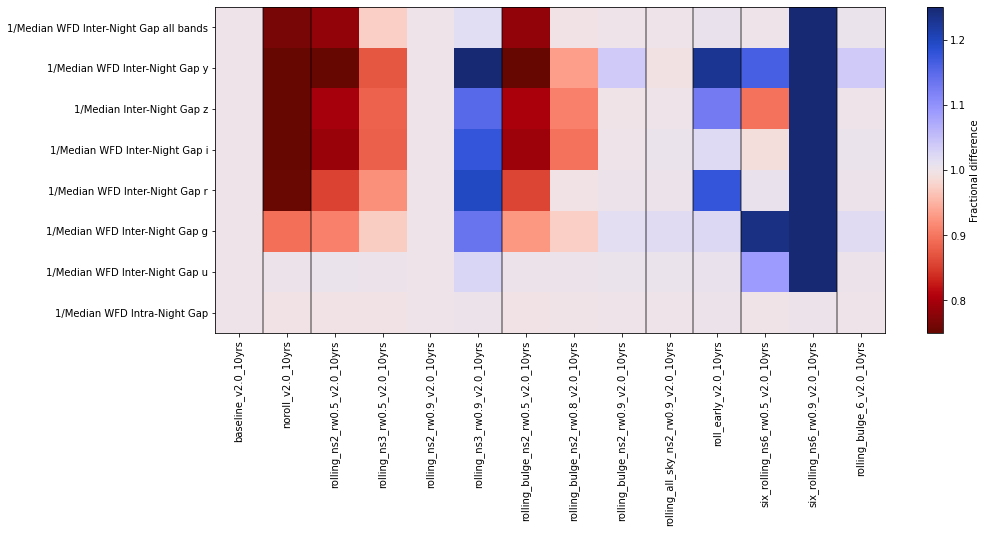

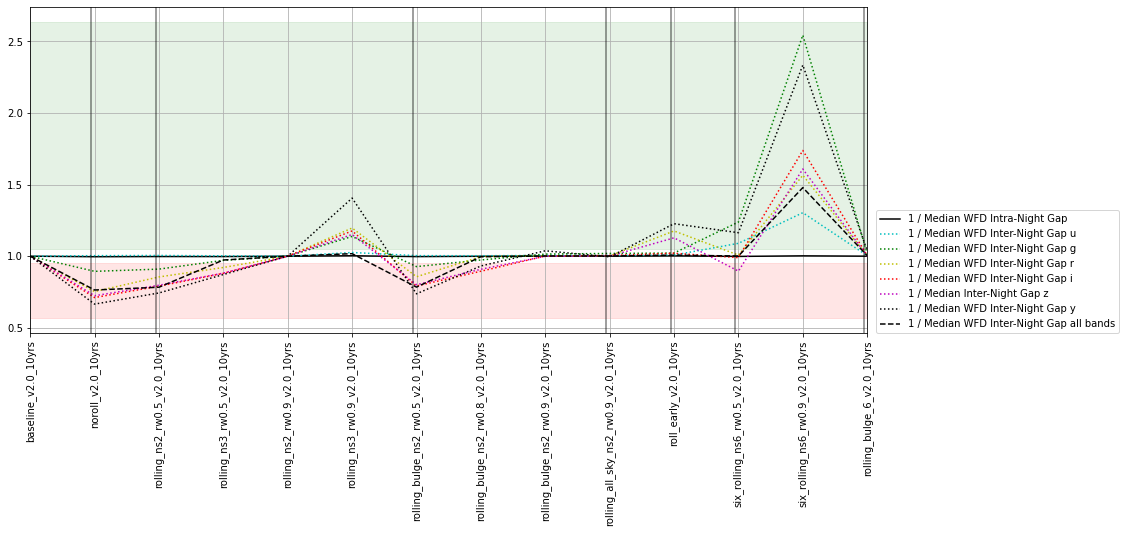

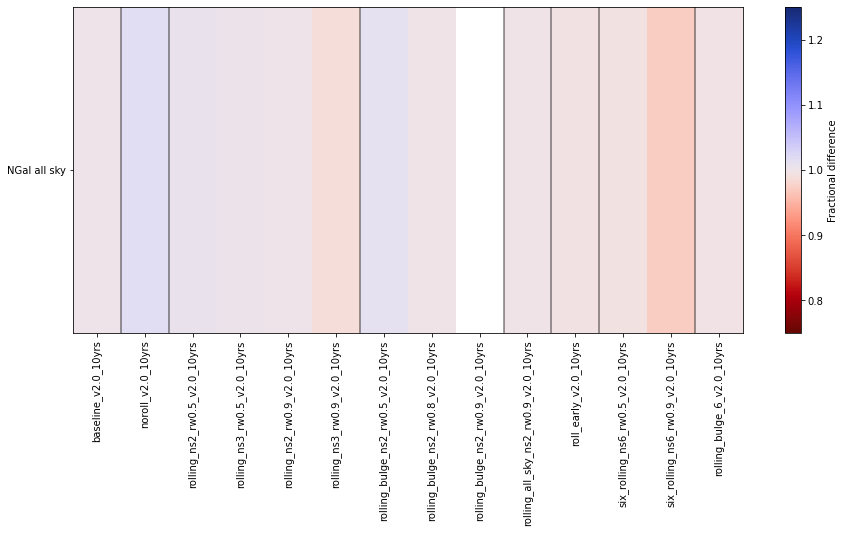

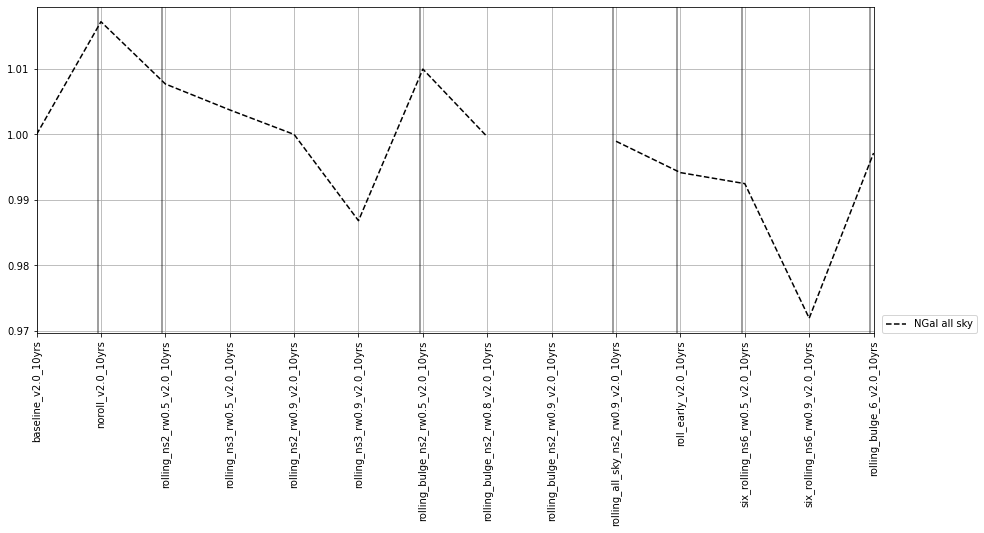

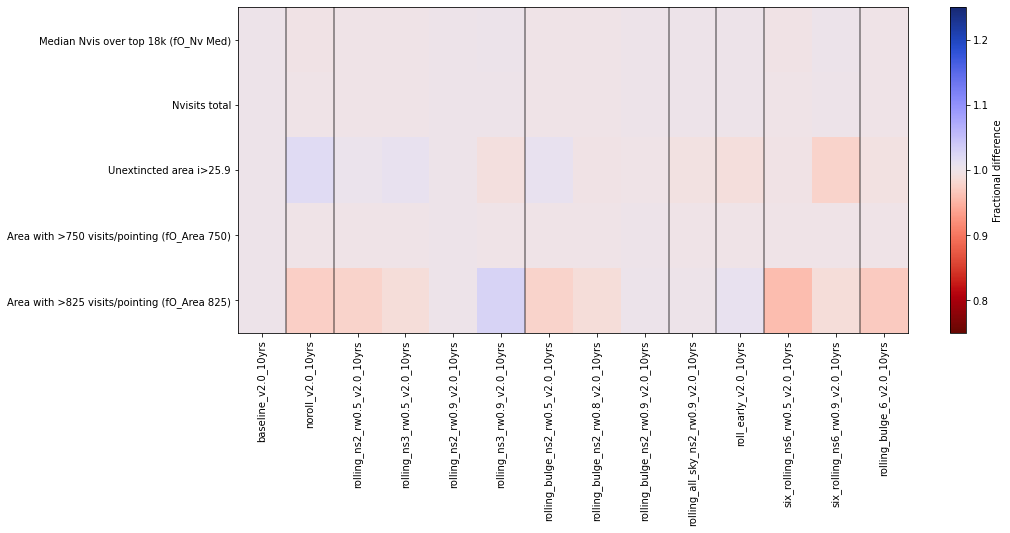

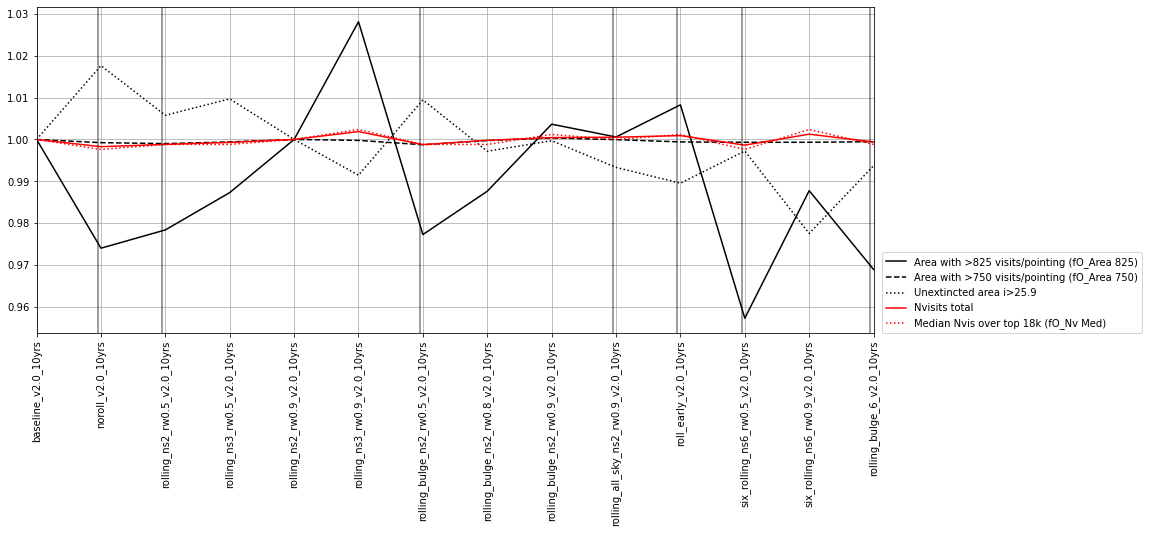

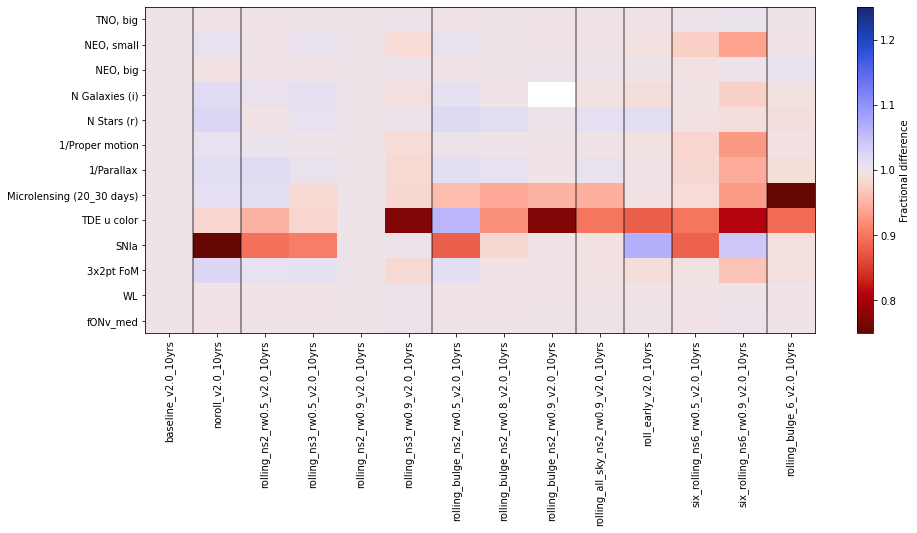

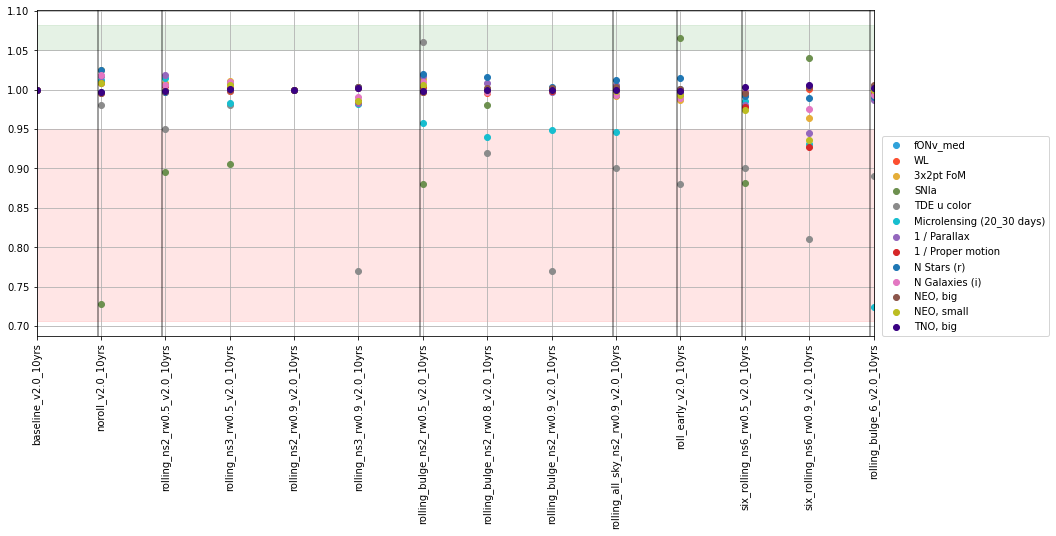

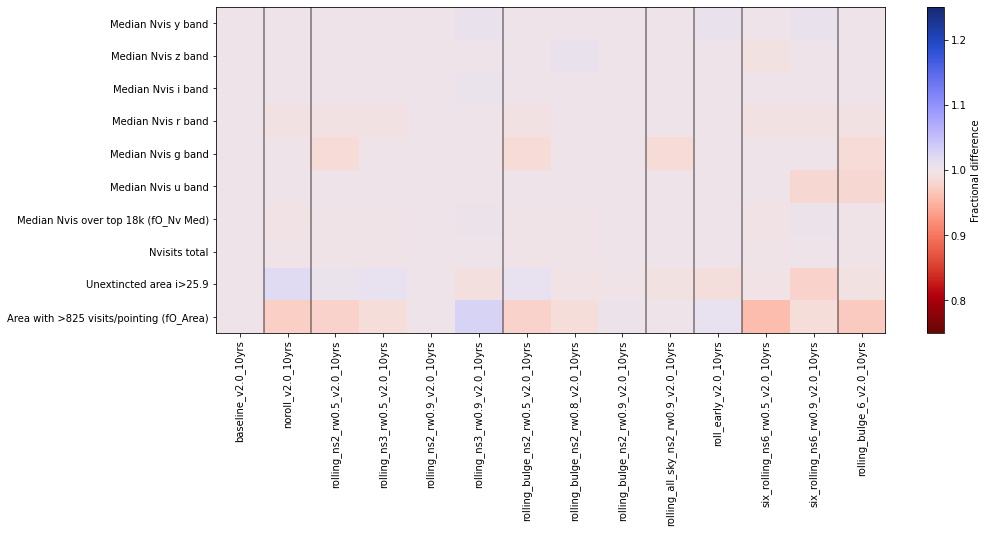

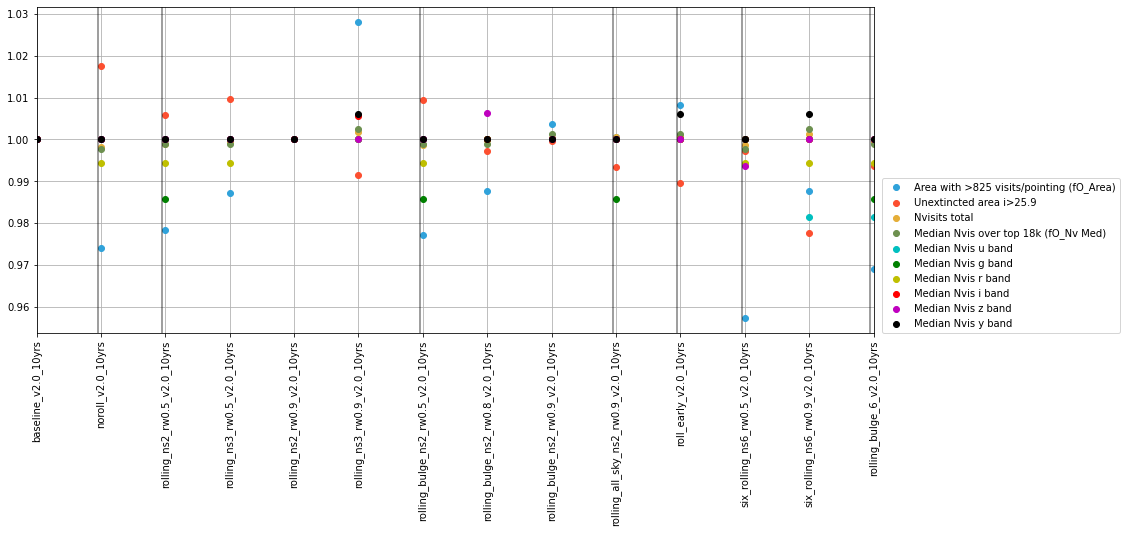

In [20]:
k_sets = [k for k in msets if not (k.startswith('AGN') or k.startswith('TVS') or k.startswith('GP ')
                                   or k.startswith('SSO') or k.startswith('DESC') or k.startswith('SRD'))]

for k in k_sets:
    msub = metric_set.loc[k]
    fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs,msub['metric']], 
                                       baseline_run=baseline_run,
                                       metric_label_map=msub['short_name'],
                                       metric_set=msub,
                                      color_range=0.5)
    fig.set_figwidth(15)
    for l in lines:
        ax.axvline(l, color='k', alpha=0.5)

    fig, ax = maf.plot_run_metric(summaries.loc[these_runs, metric_set.loc[k]['metric']], 
                                  baseline_run=baseline_run,
                                  metric_set=metric_set.loc[k],
                                  metric_label_map=metric_set.loc[k]['short_name'],
                                 horizontal_quantity='run',
                                 vertical_quantity='value')
    fig.set_figwidth(15)
    #ax.set_ylim(0.5, 1.5)
    lgd = plt.legend(loc=(1.01, 0.0), fancybox=True, numpoints=1, fontsize='medium')
    for l in lines:
        ax.axvline(l-0.05, color='k', alpha=0.5)